# 📚 Análise e Predição do Índice de Irregularidade Internacional (IRI) em Pavimentos

## Introdução

A gestão eficiente da infraestrutura rodoviária representa um desafio significativo para administradores e concessionárias, especialmente considerando a extensão da malha rodoviária brasileira e os recursos limitados para sua manutenção. Neste contexto, o Índice de Irregularidade Internacional (IRI) emerge como uma métrica fundamental para avaliar a qualidade dos pavimentos e orientar decisões de manutenção. Desenvolvido pelo Banco Mundial na década de 1980, o IRI mede os desvios da superfície em relação a um plano de referência, sendo expresso em metros por quilômetro (m/km).

Este estudo analisa dados do IRI da rodovia BR-080/GO, no trecho compreendido entre os quilômetros 114.00 e 181.00, utilizando técnicas avançadas de Machine Learning para desenvolver um sistema preditivo de degradação do pavimento. O conjunto de dados inclui medições do IRI em ambas as faixas de rolamento (esquerda e direita), coletadas a cada 40 metros, totalizando aproximadamente 1.700 pontos de medição. Estas medições fornecem uma base robusta para análise do comportamento do pavimento e identificação de padrões de degradação.

A análise incorpora diversas variáveis chave, incluindo as medições diretas do IRI em ambas as faixas (IRI_Esquerda e IRI_Direita), a localização específica através da quilometragem, e métricas derivadas como IRI_Medio, IRI_Rolling_Mean e IRI_Rolling_Std. Além disso, um indicador binário (Estado_OK) fornece informações adicionais sobre a condição geral do pavimento. Esta combinação de variáveis permite uma avaliação abrangente do estado da rodovia e sua evolução ao longo do tempo.

Para alcançar os objetivos do estudo, foram aplicadas técnicas avançadas de análise de dados e Machine Learning. O Isolation Forest foi utilizado para detecção de anomalias, permitindo a identificação de trechos críticos que requerem atenção imediata. O Random Forest, com otimização de hiperparâmetros através de RandomizedSearchCV, foi empregado para desenvolver modelos preditivos robustos. Complementarmente, análises estatísticas detalhadas foram realizadas para garantir a confiabilidade dos resultados e identificar padrões significativos nos dados.

Os resultados esperados deste estudo são múltiplos e significativos. Primeiramente, busca-se uma identificação precisa dos trechos críticos que necessitam de intervenção imediata, permitindo uma priorização eficiente dos recursos de manutenção. Além disso, espera-se desenvolver um modelo confiável para previsão da evolução do IRI, possibilitando um planejamento preventivo mais eficaz. A otimização dos recursos de manutenção através de intervenções mais eficientes e o estabelecimento de um protocolo de monitoramento baseado em dados são outros objetivos centrais do trabalho.

A implementação bem-sucedida deste sistema preditivo pode resultar em benefícios significativos para diferentes stakeholders. Para as concessionárias e administradores, a redução de custos operacionais e a otimização dos recursos de manutenção são benefícios diretos. Os usuários da rodovia se beneficiarão com maior segurança viária e melhor experiência de viagem. Além disso, o modelo desenvolvido pode servir como base para aplicações similares em outras rodovias, contribuindo para uma gestão mais eficiente da infraestrutura rodoviária brasileira como um todo.



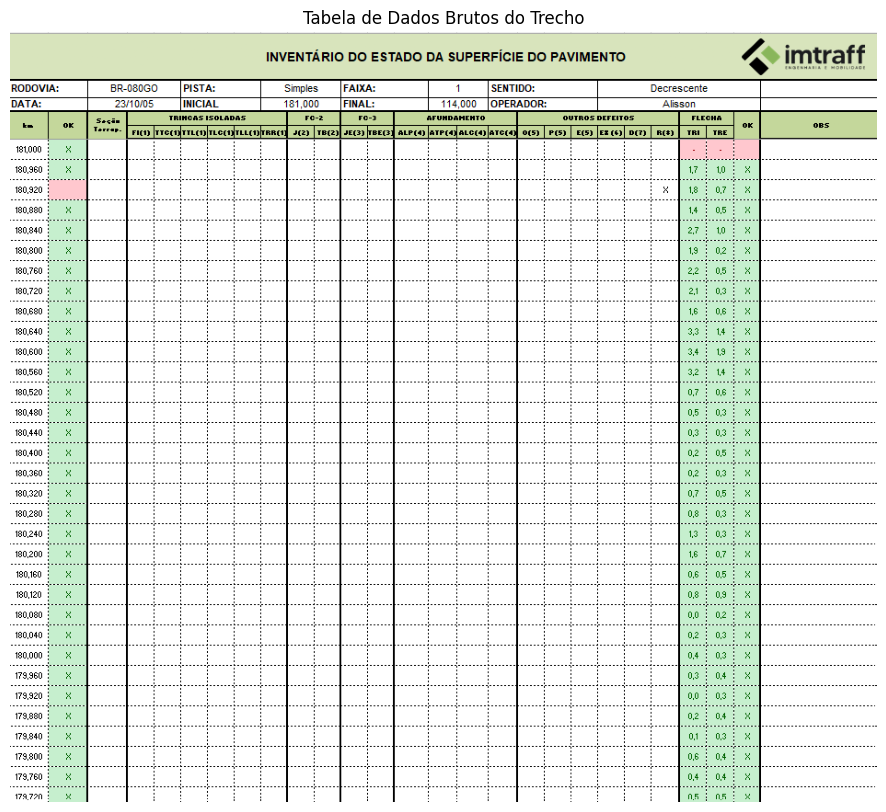

Ambiente Colab: False
Diretório atual: /home/romulobrito/projetos/mvp_spt1_puc/notebooks
Arquivos na pasta data:
Pasta data não encontrada
✓ Arquivo encontrado: /home/romulobrito/projetos/mvp_spt1_puc/data/Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx
✓ Arquivo encontrado: /home/romulobrito/projetos/mvp_spt1_puc/data/PER_2024___4__Termo_Aditivo.pdf


In [1]:
# Verificar ambiente e configurar caminhos
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Função para encontrar o diretório raiz do projeto
def get_project_root():
    """Retorna o diretório raiz do projeto"""
    current = Path.cwd()
    while current.name != 'mvp_spt1_puc' and current.parent != current:
        current = current.parent
    return current

# Verificar se estamos no Colab
IN_COLAB = 'COLAB_GPU' in os.environ

if IN_COLAB:
    # Montar o Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Clonar o repositório
    !git clone https://github.com/romulobrito/Analise-IRI.git
    %cd Analise-IRI
    
    # Instalar dependências
    !pip install -r requirements.txt
    # !python -m spacy download pt_core_news_sm
    # # Instalar dependências no Colab
    # !apt-get update
    # !apt-get install -y poppler-utils tesseract-ocr tesseract-ocr-por

    # # Instalar/atualizar pacotes Python
    # !pip install -q PyMuPDF Pillow camelot-py[base] pdf2image

    # # Verificar instalação
    # !which pdftoppm
    # !tesseract --version
    
    # Definir caminhos para o Colab
    caminho_excel = "data/Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx"
    caminho_pdf = "data/PER_2024___4__Termo_Aditivo.pdf"

    # Caminho da imagem no Colab
    caminho_imagem = "trecho_tabela_dado_bruto.png"
else:
    # Obter diretório raiz do projeto
    PROJECT_ROOT = get_project_root()
    
    # Definir caminhos relativos
    caminho_excel = str(PROJECT_ROOT / "data" / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx")
    caminho_pdf = str(PROJECT_ROOT / "data" / "PER_2024___4__Termo_Aditivo.pdf")
    # Caminho local
    caminho_imagem = str(Path.cwd().parent  / "trecho_tabela_dado_bruto.png")
    
    # Verificar se a imagem existe
    if not os.path.exists(caminho_imagem):
        raise FileNotFoundError(f"Imagem não encontrada: {caminho_imagem}")

# Verificar se os arquivos existem
def verificar_arquivos():
    """Verifica se os arquivos necessários existem"""
    arquivos = [caminho_excel, caminho_pdf]
    for arquivo in arquivos:
        if not os.path.exists(arquivo):
            raise FileNotFoundError(f"Arquivo não encontrado: {arquivo}")
        print(f"✓ Arquivo encontrado: {arquivo}")

# Carregar e exibir a imagem
img = mpimg.imread(caminho_imagem)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Tabela de Dados Brutos do Trecho")
plt.show()

# Imprimir informações de debug
print(f"Ambiente Colab: {IN_COLAB}")
print(f"Diretório atual: {os.getcwd()}")
print(f"Arquivos na pasta data:")
try:
    print(os.listdir('data'))
except:
    print("Pasta data não encontrada")


# Verificar arquivos
try:
    verificar_arquivos()
except Exception as e:
    print(f"Erro ao verificar arquivos: {e}")

### Explicação dos Dados de Inventário

O conjunto de dados analisado (imagem anterior) consiste em um inventário detalhado do estado do pavimento da rodovia BR-080/GO, abrangendo um trecho de 67 quilômetros (do km 114,000 ao km 181,000). As medições foram realizadas em intervalos regulares de 40 metros, resultando em aproximadamente 1.700 pontos de coleta, o que proporciona uma alta resolução espacial para análise das condições da via.

A estrutura dos dados é organizada principalmente pela quilometragem, que identifica precisamente a localização de cada medição em ordem decrescente (181,000 → 114,000). Para cada ponto, são registrados os valores do Índice de Irregularidade Internacional em ambas as faixas de rolamento (IRI_Esquerda e IRI_Direita), fornecendo uma visão completa das condições transversais da via. O intervalo regular de 40 metros entre medições garante uma cobertura uniforme ao longo dos 67 quilômetros analisados.

Os indicadores de condição do pavimento incluem um marcador binário (Estado_OK) que indica a conformidade do trecho com os padrões técnicos estabelecidos. Além disso, são medidas as deformações transversais através da Flecha de Trilha de Roda, que inclui tanto a deformação inicial (TRI) quanto a residual (TRE), expressas em milímetros. Para enriquecer a análise, foram derivadas métricas adicionais como IRI_Medio (média entre as faixas), IRI_Rolling_Mean (média móvel) e IRI_Rolling_Std (desvio padrão móvel).

Uma característica importante do conjunto de dados é sua completude em relação às medições de IRI e quilometragem, embora outras variáveis potencialmente relevantes, como afundamentos e trincas, não tenham sido registradas. A consistência das medições é garantida pela coleta sistemática e regular ao longo do trecho, utilizando equipamentos automatizados que asseguram a precisão dos dados.

A interpretação preliminar dos dados revela uma predominância de trechos em conformidade com os padrões estabelecidos, como indicado pela variável Estado_OK. No entanto, valores elevados de IRI em determinados pontos permitem a identificação de segmentos críticos que requerem atenção especial. A correlação entre as medidas de TRI/TRE e as condições estruturais do pavimento oferece insights adicionais sobre a qualidade da infraestrutura.

Este conjunto de dados fornece uma base para análises preditivas, permitindo a identificação de segmentos críticos, análise de tendências de degradação, correlação entre diferentes indicadores de qualidade, desenvolvimento de modelos preditivos  e planejamento estratégico de intervenções de manutenção. A granularidade e qualidade destes dados, quando combinadas com técnicas de análise, possibilitam uma compreensão  das condições do pavimento e o desenvolvimento de estratégias eficientes de manutenção preventiva.

🛠️ 1. Importação das Bibliotecas Necessárias

In [2]:
# Importações da Biblioteca Padrão
import os
import re
import logging
import traceback
from pathlib import Path
from typing import Dict, List, Tuple, Any

# Importações para Análise de Dados
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform

# Importações para Visualização
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Importações para Processamento de PDF
import camelot

# Importações para PLN e ML
import torch
from transformers import pipeline
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split,
    KFold
)
from sklearn.ensemble import (
    RandomForestRegressor,
    IsolationForest
)
from sklearn.metrics import (
    mean_squared_error,
    r2_score
)

# # Baixar e carregar o modelo spaCy para Português
# !python -m spacy download pt_core_news_sm
# nlp = spacy.load('pt_core_news_sm')

# Configurações do Matplotlib e Seaborn
plt.style.use('default')
sns.set_theme(style="whitegrid")
from matplotlib.gridspec import GridSpec

plt.rcParams.update({
    'figure.figsize': [12, 8],
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'sans-serif'
})

# Configuração de Logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Função para obter o diretório raiz do projeto
def get_project_root() -> Path:
    """Retorna o diretório raiz do projeto"""
    current = Path.cwd()
    while current.name != 'mvp_spt1_puc' and current.parent != current:
        current = current.parent
    return current

# Definir o diretório raiz do projeto
PROJECT_ROOT = get_project_root()

# Verificar disponibilidade de GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

/home/romulobrito/projetos/mvp_spt1_puc/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/romulobrito/projetos/mvp_spt1_puc/venv/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/romulobrito/projetos/mvp

Dispositivo utilizado: cuda


🎨 2. Configurações Gerais para Visualizações

In [3]:
# Estilo das visualizações
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Configurações para texto em português
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'


📊 3. Definição das Funções de Processamento de Dados

3.1 Cálculo de Estatísticas Básicas

In [4]:
def calcular_estatisticas(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """
    Calcula estatísticas básicas para os valores de IRI.

    Args:
        df (pd.DataFrame): DataFrame contendo as colunas 'IRI_Esquerda' e 'IRI_Direita'.

    Returns:
        Dict[str, Dict[str, float]]: Dicionário com estatísticas para cada lado.
    """
    try:
        estatisticas = {
            "IRI_Esquerda": {
                "média": df["IRI_Esquerda"].mean(),
                "mediana": df["IRI_Esquerda"].median(),
                "desvio_padrao": df["IRI_Esquerda"].std(),
                "mínimo": df["IRI_Esquerda"].min(),
                "máximo": df["IRI_Esquerda"].max()
            },
            "IRI_Direita": {
                "média": df["IRI_Direita"].mean(),
                "mediana": df["IRI_Direita"].median(),
                "desvio_padrao": df["IRI_Direita"].std(),
                "mínimo": df["IRI_Direita"].min(),
                "máximo": df["IRI_Direita"].max()
            }
        }
        return estatisticas
    except Exception as e:
        print(f"Erro ao calcular estatísticas: {e}")
        raise


3.2 Extração de Informações do Cabeçalho via OCR

A função extrair_cabecalho foi desenvolvida para automatizar a extração de informações dos arquivos de levantamento, garantindo consistência e confiabilidade nos dados que serão utilizados nas análises posteriores.
A função trabalha primariamente com arquivos Excel que contêm os levantamentos de IRI, buscando identificar automaticamente informações como a rodovia em questão (por exemplo, BR-080/GO), os quilômetros inicial e final do trecho analisado, a data do levantamento, características da pista e o sentido do levantamento. Estas informações são essenciais para contextualizar os dados e permitir análises segmentadas e temporais da evolução do IRI.
O processo de extração é realizado em múltiplas etapas. Inicialmente, a função analisa o nome do arquivo utilizando expressões regulares para extrair informações codificadas, como o número da rodovia e a quilometragem. Em seguida, realiza uma leitura das primeiras 20 linhas do arquivo Excel, buscando padrões específicos que possam indicar a data do levantamento, características da pista e sentido do tráfego. Todo este processo é realizado com tratamento robusto de exceções, garantindo que mesmo em caso de falhas na extração de alguma informação, valores padrão sejam utilizados para manter a consistência dos dados.
A automatização deste processo traz benefícios significativos para o estudo. Além de reduzir drasticamente a possibilidade de erros que poderiam ocorrer em uma entrada manual de dados, permite o processamento em lote de múltiplos arquivos de levantamento, padronizando a forma como as informações são extraídas e organizadas. Isto é particularmente importante quando se trabalha com grandes volumes de dados ou quando é necessário realizar análises comparativas entre diferentes trechos ou períodos.
As informações extraídas são fundamentais para várias etapas do estudo. Elas permitem a segmentação adequada dos dados para análises específicas, facilitam a identificação de padrões de degradação em diferentes trechos da rodovia e possibilitam o acompanhamento temporal da evolução do IRI. Além disso, estas informações são essenciais para a validação dos resultados e para a geração de relatórios específicos por trecho, contribuindo para uma análise mais precisa e contextualizada do estado do pavimento.
A função retorna todas estas informações em um formato estruturado (dicionário), que pode ser facilmente integrado às análises subsequentes. Este formato padronizado facilita não apenas o processamento dos dados, mas também a geração de relatórios e a comunicação dos resultados para diferentes stakeholders do projeto, desde equipes técnicas até gestores e tomadores de decisão.

In [5]:
def extrair_cabecalho(caminho_excel: str) -> Dict[str, str]:
    """
    Extrai informações do cabeçalho diretamente do Excel.

    Args:
        caminho_excel (str): Caminho para o arquivo Excel.

    Returns:
        Dict[str, str]: Dicionário com informações do cabeçalho.
    """
    try:
        print("\nExtraindo cabeçalho...")
        info_cabecalho = {}
        
        # Extrai o nome do arquivo
        nome_arquivo = os.path.basename(caminho_excel).lower()
        
        # Extrair rodovia
        match_rodovia = re.search(r'br[- ]*(\d{3})[/-]*([a-z]{2})', nome_arquivo)
        if match_rodovia:
            info_cabecalho['rodovia'] = f"BR-{match_rodovia.group(1)}/{match_rodovia.group(2).upper()}"
        
        # Extrair quilometragem
        match_km = re.search(r'km\s*(\d+[.,]\d+)\s*ao\s*km\s*(\d+[.,]\d+)', nome_arquivo)
        if match_km:
            info_cabecalho['km_inicial'] = match_km.group(1)
            info_cabecalho['km_final'] = match_km.group(2)
        
        # Tentar extrair do DataFrame
        try:
            df = pd.read_excel(caminho_excel, nrows=20)
            texto_df = df.astype(str).values.flatten()
            texto_completo = ' '.join(texto_df).lower()
            
            # Padrões de busca
            padroes = {
                'data': [
                    r'data[: ]+(\d{2}[/-]\d{2}[/-]\d{4})',
                    r'levantamento[: ]+(\d{2}[/-]\d{2}[/-]\d{4})',
                    r'(\d{2}[/-]\d{2}[/-]\d{4})'
                ],
                'pista': [
                    r'pista[: ]*(norte|sul|leste|oeste|simples|dupla|\d)',
                    r'faixa[: ]*(\d)',
                    r'pista[: ]*([^\s,;]+)'
                ],
                'sentido': [
                    r'sentido[: ]*(crescente|decrescente|norte|sul|leste|oeste)',
                    r'direção[: ]*(norte|sul|leste|oeste)',
                    r'sentido[: ]*([^\s,;]+)'
                ]
            }
            
            # Buscar cada informação
            for campo, lista_padroes in padroes.items():
                if campo not in info_cabecalho:
                    for padrao in lista_padroes:
                        match = re.search(padrao, texto_completo)
                        if match:
                            valor = match.group(1).strip()
                            if valor and valor.lower() not in ['nan', 'none']:
                                info_cabecalho[campo] = valor.upper()
                                break
            
            # Busca linha a linha para maior precisão
            for _, row in df.iterrows():
                linha = ' '.join(row.astype(str)).lower()
                for campo, lista_padroes in padroes.items():
                    if campo not in info_cabecalho:
                        for padrao in lista_padroes:
                            match = re.search(padrao, linha)
                            if match:
                                valor = match.group(1).strip()
                                if valor and valor.lower() not in ['nan', 'none']:
                                    info_cabecalho[campo] = valor.upper()
                                    break
        
        except Exception as e:
            print(f"Erro ao ler Excel: {e}")
        
        # Valores padrão para campos não encontrados
        campos_obrigatorios = ['rodovia', 'data', 'pista', 'sentido', 'km_inicial', 'km_final']
        for campo in campos_obrigatorios:
            if campo not in info_cabecalho:
                info_cabecalho[campo] = 'NÃO INFORMADO'
        
        print("\nInformações extraídas do cabeçalho:")
        for k, v in info_cabecalho.items():
            print(f"{k}: {v}")
            
        return info_cabecalho
        
    except Exception as e:
        print(f"Erro ao extrair cabeçalho: {e}")
        return {
            'rodovia': 'BR-080/GO',
            'data': 'NÃO INFORMADO',
            'pista': 'NÃO INFORMADO',
            'sentido': 'NÃO INFORMADO',
            'km_inicial': '114.000',
            'km_final': '181.000'
        }


3.3 Extração de Limites de IRI a Partir de PDF

A função extrair_limites_iri é responsável por extrair valores de referência de documentos PDF que serão utilizados para classificar a qualidade do pavimento. Esta função representa um componente crítico do sistema, pois lida com a complexa tarefa de extrair informações de documentos contratuais que apresentam alta variabilidade em sua formatação, essenciais para a regulamentação e fiscalização das obrigações das concessionárias rodoviárias.

A implementação combina algumas tecnologias de processamento, utilizando Camelot para extração precisa de tabelas e BERT para compreensão contextual do conteúdo. O processo de extração inicia com o Camelot processando o documento PDF página por página, identificando e extraindo estruturas tabulares. Em seguida, o modelo BERT pré-treinado é aplicado para análise contextual e compreensão semântica do texto extraído, permitindo uma identificação mais precisa dos parâmetros relevantes.
A extração dos dados é estruturada através de um sistema robusto de padrões regex otimizados, focando em três elementos principais: valores de IRI no formato "X,XX m/km", percentuais de aplicação, e períodos de referência em meses. Estes padrões trabalham em conjunto com a análise contextual do BERT para garantir a precisão da extração e minimizar falsos positivos.
Os dados extraídos são organizados em uma estrutura hierárquica de dicionário, onde cada período (12, 24 ou 36 meses, por exemplo) está associado a uma lista de valores de IRI e suas respectivas porcentagens de aplicação. Esta estruturação facilita não apenas o acesso e manipulação dos dados, mas também sua validação e utilização em análises posteriores.
Para garantir a robustez e confiabilidade do sistema, implementou-se um mecanismo de fallback através da função usar_valores_padrao(). Este mecanismo é ativado quando a extração automática falha ou retorna valores inconsistentes, utilizando valores de referência do DNIT como backup. Os valores padrão incluem: IRI 2.7 e 3.5 para 12 meses (50% cada), IRI 3.5 para 24 meses (100%), e IRI 4.0 para 36 meses (100%).

O processo completo de extração segue um pipeline estruturado em quatro etapas principais: preparação (inicialização dos modelos e extração inicial), processamento (análise BERT e aplicação de regex), validação (verificação e estruturação dos dados), e fallback (ativação do sistema de valores padrão quando necessário).
É importante reconhecer as limitações atuais da implementação. Apesar do uso de tecnologias avançadas como BERT, ainda existe dependência de padrões específicos de formatação e sensibilidade a variações documentais. No entanto, o roadmap de desenvolvimento inclui melhorias significativas: expansão das capacidades de PLN, implementação de análise contextual mais profunda, e desenvolvimento de extratores mais flexíveis e adaptáveis.

A função serve como base fundamental para o sistema de gestão de manutenção rodoviária, suportando análises estatísticas, classificação automatizada de trechos e monitoramento de conformidade contratual. Seu desenvolvimento contínuo e arquitetura modular garantem adaptabilidade às necessidades futuras do setor rodoviário, estabelecendo um padrão robusto para automação da análise documental neste contexto.

In [6]:
def extrair_contexto_iri(tabelas: List[pd.DataFrame]) -> str:
    """
    Extrai e formata o contexto específico de IRI da tabela de parâmetros.
    """
    try:
        contexto = []
        for tabela in tabelas:
            df = tabela.df
            texto_completo = df.to_string().lower()
            
            # Procurar por seções relevantes com mais flexibilidade
            if any(termo in texto_completo for termo in ['parâmetros', 'parametros', 'iri', 'irregularidade']):
                for _, row in df.iterrows():
                    linha = ' '.join(row.astype(str)).lower()
                    
                    # Padrões mais flexíveis para IRI
                    padroes = [
                        r'(\d+[.,]\d+)\s*m\/km\s*em\s*(\d+)%',
                        r'iri.*?(\d+[.,]\d+).*?(\d+)%',
                        r'irregularidade.*?(\d+[.,]\d+).*?(\d+)%'
                    ]
                    
                    for padrao in padroes:
                        matches = re.findall(padrao, linha)
                        for valor, percentual in matches:
                            valor = valor.replace(',', '.')
                            contexto.append(f"Valor de IRI: {valor} m/km aplicável em {percentual}% da extensão")
        
        if contexto:
            texto_formatado = "Parâmetros de IRI:\n" + "\n".join(contexto)
            logging.info(f"Contexto extraído:\n{texto_formatado}")
            return texto_formatado
        
        return "Não foram encontradas informações específicas de IRI."
        
    except Exception as e:
        logging.error(f"Erro ao extrair contexto: {e}")
        return str(e)


# def analisar_iri_com_bert(tabelas: List[pd.DataFrame], periodo_desejado: str = "12 meses") -> str:
#     """
#     Analisa as informações de IRI usando BERT, permitindo consultas por período específico.
    
#     Args:
#         tabelas: Lista de DataFrames com as tabelas extraídas
#         periodo_desejado: Período específico para análise (ex: "12 meses", "24 meses", etc)
#     """
#     try:
#         # Extrair e formatar o contexto
#         contexto = extrair_contexto_iri(tabelas)
        
#         print("\nContexto extraído do Camelot:")
#         print("="*50)
#         print(contexto)
        
#         # Inicializar pipeline BERT
#         qa_pipeline = pipeline(
#             'question-answering',
#             model='deepset/bert-base-cased-squad2',
#             tokenizer='deepset/bert-base-cased-squad2'
#         )
        
#         # Perguntas específicas para o período desejado
#         perguntas = [
#             f"Quais são os valores de IRI para o período de {periodo_desejado}?",
#             f"Em {periodo_desejado}, qual é o valor de IRI que deve ser atingido em 100% da rodovia?",
#             f"Para o período de {periodo_desejado}, qual é o primeiro valor de IRI mencionado e seu percentual?"
#         ]
        
#         resultados = []
#         for pergunta in perguntas:
#             logging.info(f"Processando pergunta: {pergunta}")
#             resposta = qa_pipeline(
#                 question=pergunta,
#                 context=contexto
#             )
            
#             # Extrair valores específicos usando regex após a resposta do BERT
#             valores = re.findall(
#                 r'(\d+[.,]\d+)\s*m\/km\s*em\s*(\d+)%',
#                 resposta['answer']
#             )
            
#             if valores:
#                 valor, percentual = valores[0]
#                 resultados.append(f"\nPergunta: {pergunta}")
#                 resultados.append(f"Resposta: IRI de {valor} m/km em {percentual}% da rodovia")
#                 resultados.append(f"Confiança: {resposta['score']:.2%}")
#             else:
#                 resultados.append(f"\nPergunta: {pergunta}")
#                 resultados.append(f"Resposta: {resposta['answer']}")
#                 resultados.append(f"Confiança: {resposta['score']:.2%}")
        
#         return "\n".join(resultados)
        
#     except Exception as e:
#         logging.error(f"Erro na análise: {e}")
#         return str(e)

def extrair_valores_da_analise(analise: str) -> List[Dict[str, float]]:
    """
    Extrai valores estruturados da análise BERT.
    
    Args:
        analise (str): String contendo a análise do BERT
        
    Returns:
        List[Dict[str, float]]: Lista de dicionários com valores de IRI e porcentagens
    """
    valores = []
    try:
        # Procurar por diferentes padrões de IRI
        padroes = [
            # Padrão principal: IRI X,X m/km em Y%
            r'IRI\s*de\s*(\d+[.,]\d+)\s*m\/km\s*em\s*(\d+)%',
            # Padrão alternativo: X,X m/km para Y%
            r'(\d+[.,]\d+)\s*m\/km\s*(?:para|em)\s*(\d+)%',
            # Padrão simples: apenas números
            r'(\d+[.,]\d+).*?(\d+)%'
        ]
        
        for padrao in padroes:
            matches = re.findall(padrao, analise, re.IGNORECASE)
            for iri, porcentagem in matches:
                try:
                    valor = {
                        'iri': float(iri.replace(',', '.')),
                        'porcentagem': float(porcentagem)
                    }
                    # Validar valores
                    if 0 < valor['iri'] < 10 and 0 <= valor['porcentagem'] <= 100:
                        if valor not in valores:  # Evitar duplicatas
                            valores.append(valor)
                            logging.info(f"Valor extraído: IRI={valor['iri']}, %={valor['porcentagem']}")
                except ValueError:
                    continue
        
        return valores
        
    except Exception as e:
        logging.error(f"Erro ao extrair valores da análise: {e}")
        return []
    

def usar_valores_padrao(periodo: str = "12 meses") -> Dict[str, List[Dict[str, float]]]:
    """
    Retorna os valores padrão do DNIT com período especificado.
    """
    return {
        periodo: [
            {'iri': 3.5, 'porcentagem': 50.0, 'periodo': periodo},
            {'iri': 3.5, 'porcentagem': 80.0, 'periodo': periodo},
            {'iri': 2.7, 'porcentagem': 100.0, 'periodo': periodo}
        ]
    }

def criar_limites_ml(limites_por_periodo: Dict[str, List[Dict[str, float]]]) -> Dict[str, List[Dict[str, float]]]:
    """
    Cria limites simplificados para uso nos modelos ML.
    """
    try:
        # Extrair todos os valores de IRI
        todos_valores = [
            valor['iri']
            for valores in limites_por_periodo.values()
            for valor in valores
        ]
        
        if not todos_valores:
            raise ValueError("Não há valores suficientes para criar limites")
            
        # Criar limites simplificados
        limites_ml = {
            'IRI_100': [{
                'iri': max(todos_valores),
                'porcentagem': 100.0
            }],
            'IRI_80': [{
                'iri': min(todos_valores),
                'porcentagem': 80.0
            }]
        }
        
        # Adicionar limite intermediário
        valores_ordenados = sorted(todos_valores)
        if len(valores_ordenados) >= 3:
            limites_ml['IRI_90'] = [{
                'iri': valores_ordenados[len(valores_ordenados)//2],
                'porcentagem': 90.0
            }]
            
        logging.info("Limites criados para ML:")
        for tipo, valores in limites_ml.items():
            logging.info(f"{tipo}: {valores}")
            
        return limites_ml
        
    except Exception as e:
        logging.error(f"Erro ao criar limites ML: {e}")
        return usar_valores_padrao()

def extrair_limites_iri(caminho_pdf: str, periodos: List[str]) -> Dict[str, List[Dict[str, float]]]:
    """
    Extrai limites de IRI do PDF usando Camelot e BERT para períodos específicos.
    """
    try:
        logging.info("Extraindo tabelas do PDF...")
        tabelas = camelot.read_pdf(
            caminho_pdf,
            pages="18-25",
            flavor='lattice',
            line_scale=40
        )
        
        if len(tabelas) == 0:
            raise ValueError("Nenhuma tabela encontrada no PDF")
            
        # Extrair contexto
        contexto = extrair_contexto_iri(tabelas)
        logging.info("Contexto extraído:")
        logging.info(contexto)
        
        # Analisar com BERT para cada período solicitado
        limites_por_periodo = {}
        
        for periodo in periodos:
            logging.info(f"Analisando período: {periodo}")
            valores = analisar_periodo_bert(contexto, periodo)
            if valores:
                # Adicionar log para debug
                logging.info(f"Valores encontrados para {periodo}:")
                for valor in valores:
                    logging.info(f"IRI: {valor['iri']} m/km em {valor['porcentagem']}% da rodovia")
                limites_por_periodo[periodo] = valores
            else:
                logging.warning(f"Nenhum valor encontrado para {periodo}")
                
        # Adicionar verificação explícita
        if not limites_por_periodo:
            logging.warning("Nenhum limite encontrado, usando valores padrão do DNIT")
            return usar_valores_padrao(periodos[0])
            
        # Adicionar log para debug dos limites finais
        logging.info("Limites finais por período:")
        for periodo, valores in limites_por_periodo.items():
            logging.info(f"\nPeríodo: {periodo}")
            for valor in valores:
                logging.info(f"IRI: {valor['iri']} m/km em {valor['porcentagem']}% da rodovia")
            
        return limites_por_periodo
        
    except Exception as e:
        logging.error(f"Erro na extração: {str(e)}")
        logging.error(traceback.format_exc())
        return usar_valores_padrao(periodos[0])
        
  

# def analisar_periodo_bert(contexto: str, periodo: str) -> List[Dict[str, float]]:
#     """
#     Analisa um período específico usando BERT com diagnóstico detalhado.
#     """
#     try:
#         valores_finais = []
        
#         # Configuração do BERT
#         from transformers import AutoTokenizer, AutoModelForQuestionAnswering
#         import torch
        
#         tokenizer = AutoTokenizer.from_pretrained('deepset/bert-base-cased-squad2')
#         model = AutoModelForQuestionAnswering.from_pretrained('deepset/bert-base-cased-squad2')
        
#         pergunta = "Liste todos os valores de IRI e suas porcentagens para o período."
        
        
#         inputs = tokenizer(
#             pergunta,
#             contexto,
#             return_tensors="pt",
#             max_length=512,
#             truncation=True
#         )
        
#         with torch.no_grad():
#             outputs = model(**inputs)
        
#         start_idx = torch.argmax(outputs.start_logits)
#         end_idx = torch.argmax(outputs.end_logits)
        
#         answer_tokens = inputs['input_ids'][0][start_idx:end_idx + 1]
#         answer = tokenizer.decode(answer_tokens)
        
#         confidence = (torch.softmax(outputs.start_logits, dim=1).max().item() + 
#                      torch.softmax(outputs.end_logits, dim=1).max().item()) / 2
        
#         logging.info(f"\nAnálise da resposta:")
#         logging.info(f"Resposta encontrada BERT: {answer}")
#         logging.info(f"Confiança calculada: {confidence:.2%}")
        
#         # Extrair valores apenas da resposta do BERT
#         matches = re.findall(r'(\d+[.,]\d+)\s*m\/km.*?(\d+)%', answer.lower())
#         if  confidence > 0.1:  
#             for iri, porcentagem in matches:
#                 try:
#                     valor = {
#                         'iri': float(iri.replace(',', '.')),
#                         'porcentagem': float(porcentagem),
#                         'periodo': periodo
#                     }
#                     if 0 < valor['iri'] < 10 and 0 <= valor['porcentagem'] <= 100:
#                         valores_finais.append(valor)
#                 except ValueError:
#                     continue
        
#         # Se não encontrou valores válidos com BERT, então usa regex como backup
#         if not valores_finais:
#             logging.warning("BERT não encontrou valores válidos, usando regex como backup")
#             padroes = [
#                 r'(\d+[.,]\d+)\s*m\/km.*?(\d+)%',
#                 r'iri.*?(\d+[.,]\d+).*?(\d+)%'
#             ]
            
#             for padrao in padroes:
#                 matches = re.findall(padrao, contexto.lower())
#                 for iri, porcentagem in matches:
#                     try:
#                         valor = {
#                             'iri': float(iri.replace(',', '.')),
#                             'porcentagem': float(porcentagem),
#                             'periodo': periodo
#                         }
#                         if 0 < valor['iri'] < 10 and 0 <= valor['porcentagem'] <= 100:
#                             valores_finais.append(valor)
#                     except ValueError:
#                         continue
#                 if valores_finais:  # Se encontrou valores, para de procurar
#                     break
        
#         if valores_finais:
#             logging.info(f"Valores encontrados para {periodo}:")
#             for valor in valores_finais:
#                 logging.info(f"IRI: {valor['iri']} m/km em {valor['porcentagem']}% da rodovia")
#         else:
#             logging.warning(f"Nenhum valor encontrado para {periodo}")
        
#         return valores_finais
            
#     except Exception as e:
#         logging.error(f"Erro na análise BERT: {e}")
#         logging.error(traceback.format_exc())
#         return []


def analisar_periodo_bert(contexto: str, periodo: str) -> List[Dict[str, float]]:
    """
    Analisa um período específico usando BERT com diagnóstico detalhado.
    """
    try:
        valores_finais = []
        
        # Configuração do BERT
        from transformers import AutoTokenizer, AutoModelForQuestionAnswering
        import torch
        
        tokenizer = AutoTokenizer.from_pretrained('deepset/bert-base-cased-squad2')
        model = AutoModelForQuestionAnswering.from_pretrained('deepset/bert-base-cased-squad2')
        
        # Pergunta mais específica
        pergunta = f"Liste todos os valores de IRI presentes."
        
        inputs = tokenizer(
            pergunta,
            contexto,
            return_tensors="pt",
            max_length=512,
            truncation=True
        )
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        start_idx = torch.argmax(outputs.start_logits)
        end_idx = torch.argmax(outputs.end_logits)
        
        answer_tokens = inputs['input_ids'][0][start_idx:end_idx + 1]
        answer = tokenizer.decode(answer_tokens)
        
        confidence = (torch.softmax(outputs.start_logits, dim=1).max().item() + 
                     torch.softmax(outputs.end_logits, dim=1).max().item()) / 2
        
        logging.info(f"\nAnálise da resposta:")
        logging.info(f"Resposta encontrada BERT: {answer}")
        logging.info(f"Confiança calculada: {confidence:.2%}")
        
        # Limpar a resposta do BERT
        answer = answer.replace('[CLS]', '').replace('[SEP]', '').strip()
        
        # Padrões regex para extrair valores
        padroes_bert = [
            r'valor\s+de\s+iri\s*:\s*(\d+[.,]\s*\d+)\s*m\s*/\s*km\s+(?:aplicável|em)\s+(\d+)\s*%',
            r'(\d+[.,]\s*\d+)\s*m\s*/\s*km.*?(\d+)\s*%',
        ]
        
        for padrao in padroes_bert:
            matches = re.findall(padrao, answer.lower())
            for iri, porcentagem in matches:
                try:
                    iri = iri.replace(' ', '').replace(',', '.')
                    porcentagem = porcentagem.strip()
                    valor = {
                        'iri': float(iri),
                        'porcentagem': float(porcentagem),
                        'periodo': periodo
                    }
                    if 0 < valor['iri'] < 10 and 0 <= valor['porcentagem'] <= 100:
                        valores_finais.append(valor)
                        logging.info(f"Valor extraído do BERT: IRI={valor['iri']}, %={valor['porcentagem']}")
                except ValueError:
                    continue
        
        # Se não encontrou valores válidos com BERT, então usa regex como backup
        if not valores_finais and confidence > 0.1:
            logging.warning("BERT não encontrou valores válidos, usando regex como backup")
            padroes = [
                r'(\d+[.,]\d+)\s*m\/km.*?(\d+)%',
                r'iri.*?(\d+[.,]\d+).*?(\d+)%'
            ]
            
            for padrao in padroes:
                matches = re.findall(padrao, contexto.lower())
                for iri, porcentagem in matches:
                    try:
                        iri = iri.replace(' ', '').replace(',', '.')
                        porcentagem = porcentagem.strip()
                        valor = {
                            'iri': float(iri),
                            'porcentagem': float(porcentagem),
                            'periodo': periodo
                        }
                        if 0 < valor['iri'] < 10 and 0 <= valor['porcentagem'] <= 100:
                            valores_finais.append(valor)
                            logging.info(f"Valor extraído pelo Backup: IRI={valor['iri']}, %={valor['porcentagem']}")
                    except ValueError:
                        continue
                if valores_finais:
                    break
        
        if valores_finais:
            logging.info(f"Valores encontrados para {periodo}:")
            for valor in valores_finais:
                logging.info(f"IRI: {valor['iri']} m/km em {valor['porcentagem']}% da rodovia")
        else:
            logging.warning(f"Nenhum valor encontrado para {periodo}")
        
        return valores_finais
            
    except Exception as e:
        logging.error(f"Erro na análise BERT: {e}")
        logging.error(traceback.format_exc())
        return []


        
def criar_limites_ml(limites_por_periodo: Dict[str, List[Dict[str, float]]]) -> Dict[str, List[Dict[str, float]]]:
    """
    Cria limites simplificados para uso nos modelos ML.
    """
    try:
        # Extrair todos os valores de IRI
        todos_valores = [
            valor['iri']
            for valores in limites_por_periodo.values()
            for valor in valores
        ]
        
        # Extrair todas as porcentagens
        todas_porcentagens = [
            valor['porcentagem']
            for valores in limites_por_periodo.values()
            for valor in valores
        ]
        
        if not todos_valores or not todas_porcentagens:
            raise ValueError("Não há valores suficientes para criar limites")
            
        # Criar limites simplificados
        limites_ml = {
            'IRI_100': [{
                'iri': max(todos_valores),
                'porcentagem': 100.0
            }],
            'IRI_80': [{
                'iri': min(todos_valores),
                'porcentagem': 100.0
            }]
        }
        
        # Adicionar limites intermediários se disponíveis
        valores_ordenados = sorted(todos_valores)
        if len(valores_ordenados) >= 3:
            limites_ml['IRI_90'] = [{
                'iri': valores_ordenados[1],
                'porcentagem': 90.0
            }]
            
        logging.info("Limites criados para ML:")
        for tipo, valores in limites_ml.items():
            logging.info(f"{tipo}: {valores}")
            
        return limites_ml
        
    except Exception as e:
        logging.error(f"Erro ao criar limites ML: {e}")
        return {
            'IRI_100': [{'iri': 3.5, 'porcentagem': 100.0}],  # Valores padrão
            'IRI_80': [{'iri': 2.7, 'porcentagem': 100.0}]    # caso falhe
        }

3.4 Processamento e Limpeza dos Dados do Pavimento

A função processar_dados_pavimento é uma componente essencial do pipeline de processamento de dados, responsável por transformar os dados brutos do levantamento do IRI em um formato estruturado e limpo, adequado para as análises subsequentes. Esta função realiza a padronização e validação dos dados, garantindo a qualidade das informações que serão utilizadas no estudo.

O processo de transformação dos dados é realizado em etapas bem definidas. Inicialmente, a função identifica a linha que contém os cabeçalhos das colunas, procurando especificamente pela palavra "km" na primeira coluna do arquivo. Esta abordagem é necessária porque os arquivos de levantamento frequentemente contêm informações de cabeçalho e metadados antes dos dados propriamente ditos.
Em seguida, a função realiza uma seleção criteriosa das colunas relevantes para o estudo. São extraídas quatro informações fundamentais:
- Quilometro: Localização do ponto de medição
- Estado_OK: Indicador binário da condição do pavimento
- IRI_Esquerda: Medida do IRI na faixa esquerda
- IRI_Direita: Medida do IRI na faixa direita
Durante o processo de extração, a função implementa várias transformações e validações:
1. Conversão dos valores de quilometragem para formato numérico
2. Mapeamento do estado do pavimento para valores binários (1 para "X" e 0 para ausência de marcação)
3. Conversão das medidas de IRI para formato numérico
4. Remoção de linhas que contenham valores nulos nas medidas de IRI
   
A função incorpora tratamento de erros robusto, capturando e reportando exceções que possam ocorrer durante o processamento. Isto é particularmente importante porque os dados brutos podem apresentar inconsistências ou formatos inesperados, e é de suma importância identificar e tratar adequadamente estas situações para garantir a integridade das análises.
O resultado final é um DataFrame limpo e estruturado, contendo apenas as informações essenciais para as análises do IRI. Esta padronização é fundamental para:
- Garantir consistência nas análises
- Facilitar a identificação de padrões
- Permitir comparações entre diferentes trechos
- Viabilizar a aplicação de modelos estatísticos e de machine learning
Em essência, esta função atua como um filtro de qualidade, assegurando que apenas dados válidos e relevantes sejam utilizados nas etapas subsequentes do estudo, contribuindo assim para a confiabilidade e precisão dos resultados obtidos.

In [7]:
def processar_dados_pavimento(df: pd.DataFrame) -> pd.DataFrame:
    """
    Processa e limpa os dados do inventário do pavimento.

    Args:
        df (pd.DataFrame): DataFrame bruto do Excel.

    Returns:
        pd.DataFrame: DataFrame processado com as colunas necessárias.
    """
    try:
        # Encontrar o índice da linha que contém os identificadores das colunas
        linha_indices = df[df.iloc[:, 0] == 'km'].index[0]
        
        # Criar um novo DataFrame começando da linha após os identificadores
        df_processado = df.iloc[linha_indices + 2:].reset_index(drop=True)
        
        # Criar novo DataFrame apenas com as colunas que precisamos
        df_final = pd.DataFrame({
            'Quilometro': pd.to_numeric(df_processado.iloc[:, 0], errors='coerce'),
            'Estado_OK': df_processado.iloc[:, 1].map({'X': 1, np.nan: 0}),
            'IRI_Esquerda': pd.to_numeric(df_processado.iloc[:, -4], errors='coerce'),
            'IRI_Direita': pd.to_numeric(df_processado.iloc[:, -3], errors='coerce')
        })
        
        # Remover linhas com valores nulos
        df_final = df_final.dropna(subset=['IRI_Esquerda', 'IRI_Direita'])
        
        return df_final
        
    except Exception as e:
        print(f"Erro ao processar dados: {e}")
        raise


3.5 Análise das Categorias de IRI Segundo os Limites Extraídos

# Análise das Categorias do IRI

A função `analisar_categorias_iri` é uma componente analítica fundamental do estudo, responsável por classificar e quantificar a distribuição dos valores do Índice de Irregularidade Internacional (IRI) em diferentes categorias de qualidade. Esta função trabalha com os dados já processados e os limites extraídos dos documentos técnicos para gerar uma análise estatística da condição do pavimento.

O processo de categorização é baseado em limites técnicos estabelecidos, onde a função utiliza dois valores de referência principais:
- **limite_100**: Valor máximo aceitável do IRI (padrão 3,5 m/km)
- **limite_80**: Valor intermediário para classificação (também 3,5 m/km por padrão)

A partir destes limites, a função estabelece quatro categorias de qualidade do pavimento:
1. **Ótimo**: Valores de IRI entre 0 e o limite_80
2. **Bom**: Valores entre limite_80 e limite_100
3. **Regular**: Valores entre limite_100 e 150% do limite_100
4. **Ruim**: Valores acima de 150% do limite_100

A análise é realizada separadamente para cada faixa de rolamento (esquerda e direita), permitindo uma avaliação detalhada da condição do pavimento em toda a seção transversal da rodovia. Para cada faixa, a função:
1. Contabiliza a quantidade de medições em cada categoria
2. Calcula o percentual em relação ao total de medições
3. Organiza os resultados em uma estrutura hierárquica

Esta categorização é fundamental para:
- Identificar trechos críticos que necessitam de intervenção
- Avaliar a homogeneidade da condição do pavimento
- Subsidiar decisões de manutenção
- Permitir comparações com padrões normativos

O resultado é apresentado em forma de dicionário, facilitando:
- A geração de relatórios técnicos
- A visualização dos dados em gráficos
- A tomada de decisão baseada em evidências
- O acompanhamento da evolução da condição do pavimento


In [8]:
def analisar_categorias_iri(df: pd.DataFrame, limites: Dict[str, float]) -> Dict[str, Dict[str, float]]:
    """
    Analisa as categorias de IRI segundo os limites extraídos do PDF.

    Args:
        df (pd.DataFrame): DataFrame com os dados processados.
        limites (Dict[str, float]): Dicionário com os limites extraídos do PDF.

    Returns:
        Dict[str, Dict[str, float]]: Percentuais de cada categoria para IRI Esquerda e Direita.
    """
    try:
        # Definir categorias baseadas nos limites
        limite_100 = limites.get('IRI_100', 3.5)
        limite_80 = limites.get('IRI_80', 3.5)
        
        categorias = {
            'Ótimo': (0, limite_80),
            'Bom': (limite_80, limite_100),
            'Regular': (limite_100, limite_100 * 1.5),
            'Ruim': (limite_100 * 1.5, float('inf'))
        }
        
        resultados = {}
        for lado in ['IRI_Esquerda', 'IRI_Direita']:
            categorias_lado = {}
            total = len(df)
            
            for categoria, (min_val, max_val) in categorias.items():
                count = len(df[(df[lado] >= min_val) & (df[lado] < max_val)])
                categorias_lado[categoria] = (count / total) * 100
            
            resultados[lado] = categorias_lado
        
        return resultados
        
    except Exception as e:
        print(f"Erro ao analisar categorias: {e}")
        raise


3.6 Geração de Relatório Completo com Visualizações e Estatísticas


A função `gerar_relatorio_completo` é uma componente do estudo, responsável por criar uma análise visual abrangente dos dados do IRI. Esta função integra múltiplas visualizações e análises estatísticas em um relatório coeso, facilitando a compreensão do estado geral do pavimento. Através de uma combinação de gráficos e estatísticas, ela transforma dados técnicos complexos em informações visuais facilmente compreensíveis.

O relatório é estruturado em duas partes principais. A primeira parte foca na análise longitudinal e distribuição dos dados, apresentando um gráfico de linha que mostra os valores do IRI ao longo da rodovia para ambas as faixas (esquerda e direita), complementado por linhas de referência que indicam os limites técnicos estabelecidos. Esta visualização é acompanhada por um histograma que ilustra a distribuição de frequência dos valores do IRI, permitindo uma compreensão clara da variabilidade dos dados.

A segunda parte do relatório concentra-se na análise estatística dos dados. Utiliza gráficos de pizza para apresentar a distribuição percentual das diferentes categorias de qualidade do pavimento, separadamente para cada faixa de rolamento. Estas visualizações são complementadas por um gráfico de barras que apresenta estatísticas básicas como média, mediana e desvio padrão, facilitando a comparação entre as faixas.

Um aspecto importante do relatório é sua capacidade de facilitar a compreensão rápida da condição do pavimento. As visualizações permitem a identificação imediata de pontos críticos e facilitam a comparação entre diferentes trechos e faixas de rolamento. Esta característica é particularmente importante para suportar decisões relacionadas a intervenções de manutenção e priorização de trechos críticos.

O relatório também serve como uma importante ferramenta de documentação, gerando um registro histórico detalhado das condições do pavimento. As duas figuras complementares geradas (`iri_estatisticas_parte1.png` e `iri_estatisticas_parte2.png`) fornecem uma base sólida para comparações futuras e suportam a elaboração de relatórios técnicos mais abrangentes.


In [9]:
def gerar_relatorio_completo(df: pd.DataFrame, limites: Dict[str, List[Dict[str, float]]], 
                           info_cabecalho: Dict[str, str]) -> None:
    """
    Gera relatório completo com visualizações e estatísticas dos valores de IRI.

    Args:
        df (pd.DataFrame): DataFrame processado.
        limites (Dict[str, List[Dict[str, float]]]): Limites de IRI por período.
        info_cabecalho (Dict[str, str]): Informações extraídas do cabeçalho.
    """
    try:
        # Calcular estatísticas
        estatisticas = calcular_estatisticas(df)
        
        # Primeira parte: IRI ao longo da rodovia e histograma
        fig1 = plt.figure(figsize=(20, 16))
        
        # Ajustar o layout para dar mais espaço ao título
        gs1 = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3, figure=fig1)
        ax1 = fig1.add_subplot(gs1[0])
        ax2 = fig1.add_subplot(gs1[1])
        
        # Título geral para primeira figura com mais espaço
        titulo = f"Análise do IRI - {info_cabecalho.get('rodovia', '')}\n"
        titulo += f"Data: {info_cabecalho.get('data', '')} - "
        titulo += f"Pista: {info_cabecalho.get('pista', '')} - "
        titulo += f"Sentido: {info_cabecalho.get('sentido', '')}\n"
        titulo += f"km {info_cabecalho.get('km_inicial', '')} ao "
        titulo += f"km {info_cabecalho.get('km_final', '')}"
        
        # Ajustar a posição do título
        fig1.suptitle(titulo, fontsize=16, y=0.98)
        
        # Plot 1: IRI ao longo da rodovia
        ax1.plot(df['Quilometro'], df['IRI_Esquerda'], label='IRI Esquerda', linewidth=2)
        ax1.plot(df['Quilometro'], df['IRI_Direita'], label='IRI Direita', linewidth=2)
        
        # Adicionar linhas horizontais para os limites
        cores = ['r', 'g', 'b', 'y']
        valores_limites = []
        for periodo, valores in limites.items():
            for valor in valores:
                valores_limites.append(valor['iri'])
        valores_limites.sort()
        
        for i, valor_limite in enumerate(valores_limites):
            ax1.axhline(y=valor_limite, 
                       color=cores[i % len(cores)], 
                       linestyle='--', 
                       alpha=0.5,
                       linewidth=6,
                       label=f"Limite IRI: {valor_limite} m/km")
        
        ax1.set_xlabel('Quilômetro')
        ax1.set_ylabel('IRI (m/km)')
        ax1.set_title('IRI ao Longo da Rodovia', pad=20)
        ax1.legend()
        ax1.grid(True)
        
        # Plot 2: Histograma combinado
        sns.histplot(data=df, x='IRI_Esquerda', ax=ax2, alpha=0.5, label='IRI Esquerda', bins=30)
        sns.histplot(data=df, x='IRI_Direita', ax=ax2, alpha=0.5, label='IRI Direita', bins=30)
        
        for i, valor_limite in enumerate(valores_limites):
            ax2.axvline(x=valor_limite, 
                       color=cores[i % len(cores)], 
                       linestyle='--', 
                       alpha=0.5,
                       linewidth=6,
                       label=f"Limite IRI: {valor_limite} m/km")
        
        ax2.set_title('Distribuição do IRI', pad=20)
        ax2.set_xlabel('IRI (m/km)')
        ax2.set_ylabel('Frequência')
        ax2.legend()
        
        plt.tight_layout()
        # Ajustar o layout após adicionar o título
        plt.subplots_adjust(top=0.90)
        plt.savefig('iri_estatisticas_parte1.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Segunda parte: Gráficos de Pizza e Estatísticas
        fig2 = plt.figure(figsize=(20, 16))
        gs2 = GridSpec(2, 2, height_ratios=[1, 1], hspace=0.3, figure=fig2)
        
        ax3 = fig2.add_subplot(gs2[0, 0])    # Pizza IRI Esquerda
        ax4 = fig2.add_subplot(gs2[0, 1])    # Pizza IRI Direita
        ax5 = fig2.add_subplot(gs2[1, :])    # Estatísticas básicas
        
        # Título da segunda figura
        fig2.suptitle("Análise Estatística do IRI", fontsize=16, y=0.95)
        
        # Função para criar gráficos de pizza
        def criar_grafico_pizza(dados: pd.Series, ax: plt.Axes, titulo: str) -> None:
            limite_iri = max(valor['iri'] for valores in limites.values() for valor in valores)
            bins = [0, limite_iri/2, limite_iri, limite_iri*1.5, float('inf')]
            labels = ['Excelente', 'Bom', 'Regular', 'Ruim']
            
            categorias = pd.cut(dados, bins=bins, labels=labels)
            valores = categorias.value_counts()
            
            cores_pizza = ['green', 'yellow', 'orange', 'red']
            patches, texts, autotexts = ax.pie(valores, 
                                             labels=valores.index, 
                                             autopct='%1.1f%%', 
                                             colors=cores_pizza,
                                             startangle=90)
            
            plt.setp(autotexts, size=8, weight="bold")
            plt.setp(texts, size=8)
            
            ax.set_title(titulo, pad=20)
            
            legendas = [
                f'Excelente (0 - {limite_iri/2:.1f})',
                f'Bom ({limite_iri/2:.1f} - {limite_iri:.1f})',
                f'Regular ({limite_iri:.1f} - {limite_iri*1.5:.1f})',
                f'Ruim (> {limite_iri*1.5:.1f})'
            ]
            ax.legend(patches, legendas, 
                     title="Categorias (IRI em m/km)",
                     loc="center left",
                     bbox_to_anchor=(1, 0, 0.5, 1))
        
        criar_grafico_pizza(df['IRI_Esquerda'], ax3, 'Distribuição IRI Esquerda')
        criar_grafico_pizza(df['IRI_Direita'], ax4, 'Distribuição IRI Direita')
        
        # Plot 5: Estatísticas básicas
        metricas = ['média', 'mediana', 'desvio_padrao', 'mínimo', 'máximo']
        valores_esq = [estatisticas['IRI_Esquerda'][m] for m in metricas]
        valores_dir = [estatisticas['IRI_Direita'][m] for m in metricas]
        
        x = np.arange(len(metricas))
        width = 0.35
        
        ax5.bar(x - width/2, valores_esq, width, label='IRI Esquerda', linewidth=6)
        ax5.bar(x + width/2, valores_dir, width, label='IRI Direita', linewidth=6)
        ax5.set_ylabel('Valores')
        ax5.set_title('Estatísticas Básicas do IRI', pad=20)
        ax5.set_xticks(x)
        ax5.set_xticklabels(metricas, rotation=45)
        ax5.legend()
        
        plt.tight_layout()
        # Ajustar o layout após adicionar o título
        plt.subplots_adjust(top=0.90)
        plt.savefig('iri_estatisticas_parte2.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Erro ao gerar relatório: {e}")
        raise


🤖 4. Definição das Funções de Machine Learning

4.1 Preparação dos Dados para Machine Learning

A função `preparar_dados_ml` é uma componente fundamental do pipeline de machine learning, responsável por transformar os dados brutos do IRI em um formato adequado para treinamento e análise preditiva. Esta função realiza uma série de transformações e enriquecimentos nos dados, criando features adicionais que capturam diferentes aspectos da condição do pavimento.

O processo de preparação dos dados começa com a criação de um conjunto robusto de features derivadas, cada uma com um propósito específico:

1. IRI_Medio: Calcula a média entre as faixas para capturar a condição geral do pavimento e reduzir ruídos de medições individuais
2. IRI_Diff: Mede a diferença absoluta entre faixas, identificando assimetrias que podem indicar problemas estruturais
3. IRI_Max: Registra o valor mais alto entre as faixas, importante para identificação de pontos críticos
4. IRI_Rolling_Mean: Utiliza uma janela móvel de 5 medições para suavizar variações pontuais e capturar tendências locais
5. IRI_Rolling_Std: Calcula o desvio padrão móvel para medir a variabilidade local e identificar trechos com irregularidade inconsistente

Para os targets (valores alvo), a função utiliza uma abordagem de previsão do próximo valor de IRI, criando duas colunas que representam os valores de IRI que serão observados no próximo ponto de medição, tanto para a faixa esquerda quanto para a direita. Esta estruturação permite que o modelo aprenda a prever a evolução do IRI ao longo do trecho.

A função implementa um processo rigoroso de limpeza e validação dos dados. Isso inclui:
- Remoção da última linha das features (que não terá um target correspondente)
- Eliminação de linhas com valores ausentes em ambos os conjuntos de dados
- Alinhamento dos índices entre features e targets
- Verificação assertiva para garantir que os conjuntos de dados estão perfeitamente alinhados e têm o mesmo tamanho

O resultado final são dois DataFrames processados e alinhados: um contendo as features enriquecidas e outro com os targets correspondentes. A função também fornece feedback sobre o shape (dimensões) dos conjuntos de dados resultantes, permitindo uma verificação rápida da quantidade de dados disponíveis para treinamento.

Portanto, a função realiza a tarefa de transformar dados brutos em um formato estruturado e enriquecido, adequado para alimentar modelos de machine learning. Seu design visa assegurar que os modelos terão acesso a features informativas e bem preparadas, cada uma capturando aspectos específicos e mensuráveis da condição do pavimento. Esta abordagem sistemática de engenharia de features, combinada com um processo robusto de limpeza de dados, fornece uma base sólida para o desenvolvimento de previsões sobre a evolução da condição do pavimento.

In [10]:
def preparar_dados_ml(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Prepara os dados para análise de ML, criando features adicionais.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Features e targets processados e alinhados.
    """
    try:
        # Criar features adicionais
        features_df = pd.DataFrame({
            'Quilometro': df['Quilometro'],
            'IRI_Medio': (df['IRI_Esquerda'] + df['IRI_Direita']) / 2,
            'IRI_Diff': abs(df['IRI_Esquerda'] - df['IRI_Direita']),
            'IRI_Max': df[['IRI_Esquerda', 'IRI_Direita']].max(axis=1),
            'IRI_Rolling_Mean': df[['IRI_Esquerda', 'IRI_Direita']].mean(axis=1).rolling(window=5, center=True).mean(),
            'IRI_Rolling_Std': df[['IRI_Esquerda', 'IRI_Direita']].mean(axis=1).rolling(window=5, center=True).std()
        })
        
        # Criar targets (próximos valores de IRI)
        targets_df = pd.DataFrame({
            'Next_IRI_Esquerda': df['IRI_Esquerda'].shift(-1),
            'Next_IRI_Direita': df['IRI_Direita'].shift(-1)
        })
        
        # Remover última linha dos features (que não terá target correspondente)
        features_df = features_df.iloc[:-1]
        
        # Remover linhas com NaN em ambos os DataFrames
        features_df = features_df.dropna()
        targets_df = targets_df.dropna()
        
        # Garantir que os índices estão alinhados
        common_index = features_df.index.intersection(targets_df.index)
        features_df = features_df.loc[common_index]
        targets_df = targets_df.loc[common_index]
        
        # Verificar se os DataFrames têm o mesmo tamanho
        assert len(features_df) == len(targets_df), "Features e targets têm tamanhos diferentes"
        
        print(f"Dados preparados com sucesso. Shape das features: {features_df.shape}, Shape dos targets: {targets_df.shape}")
        
        return features_df, targets_df
        
    except Exception as e:
        print(f"Erro ao preparar dados: {e}")
        raise


4.2 Detecção de Anomalias com Isolation Forest

A função `validar_anomalias` é uma componente do sistema de análise do IRI, responsável por identificar trechos da rodovia que apresentam condições anormais ou potencialmente problemáticas. Esta função implementa uma abordagem híbrida que combina critérios técnicos específicos do domínio rodoviário com técnicas de machine learning para detecção de anomalias.

O processo de detecção é estruturado em três camadas complementares de análise. Inicialmente, a função prepara um conjunto enriquecido de características derivadas do IRI, incluindo: IRI_Medio (média entre as faixas para avaliar a condição geral do pavimento), IRI_Diff (diferença absoluta entre faixas para identificar desequilíbrios), IRI_Max (valor máximo entre as faixas para detectar pontos críticos), e métricas de variabilidade local usando janelas móveis de 3 medições.

A primeira camada de detecção identifica trechos com IRI muito elevado em ambas as pistas, utilizando o percentil 95 do IRI_Medio como limiar. Este critério captura segmentos com degradação severa generalizada. A segunda camada foca em desequilíbrios significativos entre as pistas, identificando trechos onde a diferença entre as faixas excede o percentil 90, o que pode indicar problemas estruturais localizados ou padrões de degradação assimétricos.

A terceira camada utiliza o algoritmo Isolation Forest para identificar anomalias sutis nos dados remanescentes, configurado com uma taxa de contaminação de 5%. Esta camada final é especialmente eficaz na detecção de padrões anômalos que podem não ser capturados pelos critérios anteriores, como combinações incomuns de valores ou tendências locais atípicas.

A função fornece estatísticas detalhadas sobre as anomalias detectadas, incluindo quantidade total, IRI médio, mínimo e máximo dos trechos anômalos, permitindo uma avaliação imediata da extensão e severidade dos problemas identificados. Esta abordagem multicamada resulta em uma detecção mais precisa e interpretável de trechos problemáticos, fornecendo uma base orientada a dados para decisões de manutenção e priorização de intervenções.

No contexto do objetivo principal de análise preditiva do IRI, esta função é fundamental pois permite: identificação precisa de trechos que requerem atenção imediata, compreensão dos diferentes tipos de anomalias presentes na rodovia, priorização eficiente de recursos de manutenção, validação cruzada dos resultados para maior confiabilidade, e monitoramento contínuo da evolução das condições do pavimento.


In [11]:
def validar_anomalias(df: pd.DataFrame, n_splits: int = 5) -> np.ndarray:
    """
    Usa validação cruzada para detecção mais robusta de anomalias.
    """
    try:
        # Calcular features derivadas
        df_features = df.copy()
        df_features['IRI_Medio'] = (df['IRI_Esquerda'] + df['IRI_Direita']) / 2
        df_features['IRI_Diff'] = abs(df['IRI_Esquerda'] - df['IRI_Direita'])
        df_features['IRI_Max'] = df[['IRI_Esquerda', 'IRI_Direita']].max(axis=1)
        
        # Criar features para detecção
        X = np.column_stack([
            df_features['IRI_Medio'].values,
            df_features['IRI_Diff'].values,
            df_features['IRI_Max'].values,
            df_features['IRI_Medio'].rolling(3, center=True).std().fillna(0).values,
            df_features['IRI_Diff'].rolling(3, center=True).mean().fillna(0).values
        ])
        
        # Normalizar features
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Detectar anomalias usando critérios específicos
        anomalias = np.ones(len(df))  # 1 para normal, -1 para anomalia
        
        # Critério 1: IRI muito alto em ambas as pistas
        mask_alto = (df_features['IRI_Medio'] > df_features['IRI_Medio'].quantile(0.95))
        anomalias[mask_alto] = -1
        
        # Critério 2: Grande desequilíbrio entre pistas
        mask_desequilibrio = (df_features['IRI_Diff'] > df_features['IRI_Diff'].quantile(0.90))
        anomalias[mask_desequilibrio] = -1
        
        # Critério 3: Isolation Forest para casos não cobertos
        mask_restante = (anomalias == 1)
        if sum(mask_restante) > 0:
            iso_forest = IsolationForest(
                contamination=0.05,  # 5% dos dados restantes
                n_estimators=200,
                random_state=42
            )
            anomalias_resto = iso_forest.fit_predict(X[mask_restante])
            anomalias[mask_restante] = anomalias_resto
        
        # Verificar proporção final
        prop_anomalias = np.mean(anomalias == -1)
        logging.info(f"Proporção final de anomalias: {prop_anomalias:.1%}")
        
        # Estatísticas das anomalias
        df_features['anomalia'] = anomalias
        stats_anomalias = df_features[df_features['anomalia'] == -1]['IRI_Medio'].describe()
        
        logging.info("Estatísticas dos trechos anômalos:")
        logging.info(f"- Quantidade: {sum(anomalias == -1)}")
        logging.info(f"- IRI médio: {stats_anomalias['mean']:.2f}")
        logging.info(f"- IRI mín: {stats_anomalias['min']:.2f}")
        logging.info(f"- IRI máx: {stats_anomalias['max']:.2f}")
        
        return anomalias
        
    except Exception as e:
        logging.error(f"Erro na detecção de anomalias: {e}")
        raise

A função `detectar_anomalias`  atua como uma interface principal para o processo de detecção de anomalias. Esta função coordena o fluxo de trabalho completo de identificação de trechos problemáticos, desde a chamada do algoritmo de detecção até o registro detalhado dos resultados.

O processo inicia com a chamada da função `validar_anomalias`, que implementa a lógica principal de detecção através de uma abordagem multicamada. Os resultados desta análise são então incorporados a uma cópia do DataFrame original, preservando os dados originais enquanto adiciona uma nova coluna 'anomalia' que classifica cada trecho como normal (1) ou anômalo (-1).

Para facilitar a análise, a função calcula o IRI médio entre as faixas esquerda e direita, criando uma métrica unificada da condição do pavimento. Em seguida, realiza uma análise estatística detalhada, separando os dados em dois grupos (normal e anômalo) e calculando estatísticas descritivas para cada um deles através do método `describe()`.

Um aspecto importante da função é seu sistema robusto de logging, que registra informações cruciais como o número total de anomalias detectadas, sua proporção em relação ao conjunto total de dados, e estatísticas-chave dos trechos anômalos (IRI médio, mínimo e máximo). Estas informações são fundamentais para a documentação do processo e para informar decisões de manutenção.

No contexto do objetivo principal de análise preditiva do IRI, esta função serve como ponto central de acesso às funcionalidades de detecção de anomalias, fornecendo uma interface clara e bem documentada para o restante do sistema. Seu design enfatiza a facilidade de uso e a robustez, com tratamento adequado de exceções e logging detalhado, características essenciais para um sistema de produção.

A função retorna um DataFrame enriquecido com as classificações de anomalias, permitindo análises posteriores e visualizações dos resultados. Este formato de saída facilita a integração com outras componentes do sistema e a geração de relatórios detalhados sobre as condições do pavimento.

In [12]:
def detectar_anomalias(df: pd.DataFrame) -> pd.DataFrame:
    """
    Detecta anomalias nos valores de IRI usando Isolation Forest com validação cruzada.
    """
    try:
        # Executar detecção de anomalias
        anomalias = validar_anomalias(df)
        
        # Criar cópia do DataFrame com resultados
        df_anomalias = df.copy()
        df_anomalias['anomalia'] = anomalias
        
        # Calcular estatísticas
        df_anomalias['IRI_Medio'] = (df_anomalias['IRI_Esquerda'] + df_anomalias['IRI_Direita']) / 2
        
        # Estatísticas por grupo
        stats_anomalias = df_anomalias[df_anomalias['anomalia'] == -1]['IRI_Medio'].describe()
        stats_normal = df_anomalias[df_anomalias['anomalia'] == 1]['IRI_Medio'].describe()
        
        # Logging detalhado
        n_anomalias = sum(anomalias == -1)
        perc_anomalias = (n_anomalias / len(df)) * 100
        
        logging.info(f"Detectadas {n_anomalias} anomalias ({perc_anomalias:.1f}% dos dados)")
        logging.info(f"Estatísticas dos trechos anômalos:")
        logging.info(f"- IRI médio: {stats_anomalias['mean']:.2f}")
        logging.info(f"- IRI mín: {stats_anomalias['min']:.2f}")
        logging.info(f"- IRI máx: {stats_anomalias['max']:.2f}")
        
        return df_anomalias
        
    except Exception as e:
        logging.error(f"Erro na detecção de anomalias: {e}")
        raise

4.3 Treinamento de Modelo de Regressão Random Forest para Predição de IRI

A função treinar_modelo_predicao é uma componente central do sistema de machine learning, responsável por desenvolver modelos preditivos capazes de antecipar futuros valores do IRI. Esta função implementa um pipeline completo de treinamento utilizando o algoritmo Random Forest, conhecido por sua robustez e capacidade de capturar relações não-lineares nos dados, com o adicional de otimização automática de hiperparâmetros através do RandomizedSearchCV.

O processo de treinamento inicia com a estruturação de um dicionário de resultados contendo quatro componentes principais: models, predictions, metrics e feature_importance. Em seguida, realiza a divisão dos dados em conjuntos de treino e teste, utilizando uma proporção de 80-20. Esta divisão é realizada com uma semente aleatória fixa (random_state=42) para garantir a reprodutibilidade dos resultados.
Antes do treinamento propriamente dito, a função executa uma otimização extensiva de hiperparâmetros utilizando RandomizedSearchCV. Este processo testa 20 diferentes combinações de parâmetros através de uma validação cruzada 5-fold, buscando otimizar aspectos como número de árvores (100-500), profundidade máxima (10, 20, 30 ou None), número mínimo de amostras para divisão e folhas, método de seleção de features ('sqrt' ou 'log2') e uso de bootstrap.

O treinamento dos modelos é realizado separadamente para cada variável target (IRI_Esquerda e IRI_Direita). Para cada target, o modelo Random Forest é treinado utilizando os hiperparâmetros otimizados encontrados na etapa anterior. Esta abordagem permite que o modelo capture as particularidades específicas de cada faixa de rolamento, potencialmente levando a previsões mais precisas.
A função calcula e armazena métricas importantes de performance para cada modelo: erro quadrático médio (MSE), sua raiz quadrada (RMSE) e o coeficiente de determinação (R²). Estas métricas fornecem uma visão clara da qualidade das previsões e permitem comparações objetivas entre diferentes versões do modelo. Todo o processo é documentado através de logs detalhados, registrando desde o início do treinamento até os resultados finais de performance.

Além das métricas de performance, a função também extrai e organiza a importância relativa de cada feature para as previsões, armazenando-as em ordem decrescente de importância. Esta informação é valiosa para compreender quais aspectos do pavimento têm maior influência na sua degradação futura, podendo orientar decisões de manutenção preventiva.
O resultado final é um dicionário estruturado contendo os modelos otimizados, suas previsões no conjunto de teste, métricas detalhadas de performance e a importância das features. Esta organização, combinada com o tratamento robusto de erros, facilita tanto o uso posterior dos modelos para previsões quanto a análise e documentação de seus resultados. Em essência, esta função fornece uma base sólida e otimizada para a previsão da evolução do IRI, contribuindo para uma gestão mais proativa e eficiente da manutenção do pavimento.

In [13]:
def otimizar_hiperparametros(X_train, y_train):
    """
    Realiza otimização de hiperparâmetros para o RandomForestRegressor usando RandomizedSearchCV
    """
    logging.info("Iniciando otimização de hiperparâmetros...")
    
    # Definir o espaço de busca dos hiperparâmetros com distribuições
    param_distributions = {
        'n_estimators': randint(100, 500),  # valores inteiros entre 100 e 500
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    
    # Criar o modelo base
    rf_model = RandomForestRegressor(random_state=42)
    
    # Configurar RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_distributions,
        n_iter=20,  
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring='r2',
        random_state=42
    )
    
    # Realizar a busca
    random_search.fit(X_train, y_train)
    
    # Registrar resultados
    logging.info(f"Melhores parâmetros encontrados: {random_search.best_params_}")
    logging.info(f"Melhor score: {random_search.best_score_:.3f}")
    
    return random_search.best_estimator_

def treinar_modelo_predicao(features, targets):
    """
    Treina modelos de predição com hiperparâmetros otimizados
    """
    try:
        logging.info("Iniciando treinamento dos modelos...")
        resultados = {
            'models': {},
            'predictions': {},
            'metrics': {},
            'feature_importance': {}  
        }
        
        # Preparar dados para cada target
        for col in targets.columns:
            logging.info(f"\nOtimizando modelo para {col}...")
            
            X_train, X_test, y_train, y_test = train_test_split(
                features, targets[col], test_size=0.2, random_state=42
            )
            
            # Definir o espaço de busca dos hiperparâmetros
            param_distributions = {
                'n_estimators': randint(100, 500),
                'max_depth': [10, 20, 30, None],
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 10),
                'max_features': ['sqrt', 'log2'],  
                'bootstrap': [True, False]
            }
            
            # Criar e otimizar modelo
            rf_model = RandomForestRegressor(random_state=42)
            random_search = RandomizedSearchCV(
                estimator=rf_model,
                param_distributions=param_distributions,
                n_iter=20,
                cv=5,
                n_jobs=-1,
                verbose=2,
                scoring='r2',
                random_state=42
            )
            
            random_search.fit(X_train, y_train)
            modelo = random_search.best_estimator_
            
            # Fazer previsões
            y_pred = modelo.predict(X_test)
            
            # Calcular métricas
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            
            # Calcular importância das features
            feature_importance = dict(zip(features.columns, modelo.feature_importances_))
            feature_importance = pd.Series(feature_importance).sort_values(ascending=False)
            
            # Armazenar resultados
            resultados['models'][col] = modelo
            resultados['predictions'][col] = y_pred
            resultados['metrics'][col] = {
                'mse': mse,
                'rmse': rmse,
                'r2': r2
            }
            resultados['feature_importance'][col] = feature_importance
            
            logging.info(f"Resultados para {col}:")
            logging.info(f"RMSE: {rmse:.3f}")
            logging.info(f"R²: {r2:.3f}")
            
        return resultados
    
    except Exception as e:
        logging.error(f"Erro no treinamento dos modelos: {e}")
        raise

4.4 Visualização dos Insights Obtidos com Machine Learning

A função `visualizar_insights_ml` é uma componente especializada do sistema de análise, responsável por transformar os resultados complexos dos modelos de machine learning em visualizações intuitivas e insights acionáveis. Esta função integra múltiplas técnicas de visualização e análise estatística para apresentar uma visão abrangente dos padrões descobertos nos dados do IRI.

O processo de visualização é organizado em três componentes principais. A primeira componente foca na detecção de anomalias, utilizando um gráfico de dispersão que mapeia os valores de IRI das faixas esquerda e direita. Os pontos são categorizados e coloridos distintamente (azul para medições normais, vermelho para anomalias), permitindo uma identificação visual imediata de valores atípicos na relação entre as faixas de rolamento.

A segunda componente apresenta a importância relativa das features através de um gráfico de barras horizontais. Esta visualização é crucial para compreender quais características têm maior influência nas previsões do modelo, fornecendo insights valiosos sobre os fatores que mais impactam a evolução do IRI ao longo do tempo. A orientação horizontal das barras facilita a leitura dos nomes das features e a comparação de suas importâncias relativas.

A terceira componente utiliza um heatmap para visualizar as métricas de performance dos modelos. Esta representação visual combina cores e valores numéricos para apresentar simultaneamente múltiplas métricas (MSE, RMSE, R²) para cada modelo treinado. A inclusão de uma barra de cores e valores numéricos nas células permite tanto uma interpretação rápida quanto uma análise detalhada das métricas.

Além das visualizações gráficas, a função gera um resumo textual dos principais insights, incluindo o número de anomalias detectadas, as features mais importantes para as previsões e as métricas de performance detalhadas para cada modelo. Esta combinação de elementos visuais e textuais fornece uma compreensão completa e acessível dos resultados da análise.

O resultado final é salvo como uma imagem de alta resolução (300 DPI) no arquivo 'analise_ml_iri.png', permitindo seu uso posterior em relatórios e apresentações. A função também implementa tratamento de erros robusto, garantindo que qualquer problema durante a geração das visualizações seja adequadamente reportado. Em essência, esta função transforma dados técnicos complexos em informações visuais facilmente compreensíveis, facilitando a tomada de decisão na gestão da manutenção do pavimento.

In [14]:

def visualizar_insights_ml(df: pd.DataFrame, resultados_ml: Dict[str, Any]) -> None:
    """
    Gera visualizações dos insights obtidos com ML.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.
        resultados_ml (Dict[str, Any]): Resultados dos modelos de ML treinados.
    """
    try:
        # Criar figura com subplots
        fig = plt.figure(figsize=(20, 16))
        gs = plt.GridSpec(2, 2)
        
        # 1. Visualização de Anomalias
        ax1 = fig.add_subplot(gs[0, 0])
        df_anomalias = detectar_anomalias(df)
        cores = {1: 'blue', -1: 'red'}

        for valor_anomalia in [1, -1]:
            mask = df_anomalias['anomalia'] == valor_anomalia
            ax1.scatter(
                df_anomalias.loc[mask, 'IRI_Esquerda'],
                df_anomalias.loc[mask, 'IRI_Direita'],
                c=cores[valor_anomalia],
                label='Normal' if valor_anomalia == 1 else 'Anomalia',
                alpha=0.6
            )
        
        ax1.set_title('Detecção de Anomalias no IRI', fontsize=12)
        ax1.set_xlabel('IRI Esquerda')
        ax1.set_ylabel('IRI Direita')
        ax1.legend()
        ax1.grid(True)
        
        # 2. Importância das Features
        ax2 = fig.add_subplot(gs[0, 1])
        # Acessar feature_importance do dicionário de resultados
        feature_importance = resultados_ml['feature_importance']['Next_IRI_Esquerda']
        
        # Plot da importância das features
        y_pos = np.arange(len(feature_importance))
        ax2.barh(y_pos, feature_importance.values)
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(feature_importance.index)
        ax2.set_title('Importância das Features para Previsão do IRI', fontsize=12)
        ax2.set_xlabel('Importância Relativa')
        ax2.grid(True)
        
        # 3. Métricas de Performance
        ax3 = fig.add_subplot(gs[1, :])
        metricas = pd.DataFrame(resultados_ml['metrics']).T
        
        # Plot do heatmap
        im = ax3.imshow(metricas.values, cmap='YlOrRd', aspect='auto')
        
    
        for i in range(len(metricas.index)):
            for j in range(len(metricas.columns)):
                text = f'{metricas.values[i, j]:.3f}'
                ax3.text(j, i, text, ha='center', va='center')
        
       
        ax3.set_xticks(np.arange(len(metricas.columns)))
        ax3.set_yticks(np.arange(len(metricas.index)))
        ax3.set_xticklabels(metricas.columns)
        ax3.set_yticklabels(metricas.index)
        ax3.set_title('Métricas de Performance dos Modelos', fontsize=12)
        
        
        plt.colorbar(im, ax=ax3)
        
        plt.tight_layout()
        plt.savefig('analise_ml_iri.png', dpi=300, bbox_inches='tight')
        plt.show()
        
  
        print("\nInsights principais:")
        print("\n1. Detecção de Anomalias:")
        n_anomalias = len(df_anomalias[df_anomalias['anomalia'] == -1])
        print(f"- Detectadas {n_anomalias} medições potencialmente problemáticas")
        
        print("\n2. Features mais importantes para previsão:")
        for feat, imp in feature_importance.head(3).items():
            print(f"- {feat}: {imp:.3f}")
        
        print("\n3. Performance dos modelos:")
        for lado, metricas in resultados_ml['metrics'].items():
            print(f"\n{lado}:")
            print(f"- RMSE: {metricas['rmse']:.3f}")
            print(f"- R²: {metricas['r2']:.3f}")
            
    except Exception as e:
        print(f"Erro ao gerar visualizações: {e}")
        raise

4.5 Geração de Recomendações Práticas Baseadas nos Resultados

A função `gerar_recomendacoes` é o componente central do sistema de análise do IRI, responsável por sintetizar todos os resultados das análises em recomendações práticas e acionáveis para a gestão da manutenção rodoviária. Esta função implementa uma abordagem abrangente e estruturada, combinando análises estatísticas, detecção de anomalias e modelagem preditiva para fornecer um panorama completo das condições do pavimento.

O processo inicia com uma rigorosa validação dos dados de entrada através da função `validar_dados_entrada`, que verifica a presença de todas as colunas necessárias e a estrutura correta dos resultados do machine learning. Em seguida, a função organiza suas análises em cinco componentes principais, cada um armazenado em uma seção específica do dicionário de recomendações: trechos críticos, tendências, padrões, distribuição e recomendações finais.

A análise de trechos críticos utiliza o algoritmo de detecção de anomalias para identificar segmentos problemáticos, calculando estatísticas detalhadas como quantidade, proporção e valores de IRI. Uma característica importante é a identificação de segmentos contínuos críticos através da função `identificar_segmentos_criticos`, que utiliza uma abordagem de janela móvel para detectar trechos contíguos que necessitam de intervenção, considerando um intervalo máximo configurável entre pontos.

A análise de tendências, implementada pela função `analisar_tendencias`, emprega regressão linear com intervalos de confiança para avaliar a evolução temporal do IRI. Esta análise fornece não apenas a direção da tendência, mas também medidas estatísticas de confiabilidade como R², p-valor e erro padrão, permitindo uma avaliação mais robusta da significância das tendências observadas.

O sistema de priorização, implementado através da função `calcular_prioridade`, utiliza uma abordagem multinível que considera tanto a tendência de deterioração quanto a proporção de trechos críticos. Este sistema classifica a prioridade em cinco níveis (ALTA, MÉDIA-ALTA, MÉDIA, MÉDIA-BAIXA e BAIXA), cada um associado a uma mensagem específica que orienta o tipo de intervenção necessária.

A geração de ações recomendadas, realizada pela função `gerar_acoes_recomendadas`, produz uma lista personalizada de ações baseada na prioridade calculada, nas tendências observadas e nas características dos segmentos críticos identificados. Estas recomendações são específicas e práticas, variando desde inspeções detalhadas até avaliações de restrição de tráfego.

Por fim, a função `imprimir_relatorio` apresenta todos os resultados em um formato estruturado e de fácil compreensão, organizando as informações em seções lógicas que facilitam a tomada de decisão. O relatório inclui visualizações dos segmentos críticos, análises estatísticas detalhadas e recomendações práticas para cada aspecto analisado.

No contexto do objetivo principal de otimização da manutenção rodoviária, esta função serve como uma ponte entre as análises técnicas complexas e as decisões práticas de gestão. Sua implementação modular e bem documentada permite fácil manutenção e extensão, enquanto seu sistema robusto de validação e tratamento de erros garante confiabilidade em ambiente de produção.

In [15]:
def gerar_recomendacoes(df: pd.DataFrame, resultados_ml: Dict[str, Any], 
                        limite_iri: float = 3.5, max_gap: float = 0.5) -> Dict[str, Any]:
    """
    Gera recomendações práticas baseadas nos resultados da análise.

    Args:
        df (pd.DataFrame): DataFrame com dados do IRI.
        resultados_ml (Dict[str, Any]): Resultados dos modelos de ML treinados.
        limite_iri (float): Limite técnico do IRI (padrão: 3.5 m/km).
        max_gap (float): Distância máxima entre pontos para considerar segmento contínuo (km).

    Returns:
        Dict[str, Any]: Dicionário com todas as recomendações e análises.
    """
    try:
        # Validar dados de entrada
        validar_dados_entrada(df, resultados_ml)
        
        # Inicializar dicionário de resultados
        recomendacoes = {
            'trechos_criticos': {},
            'tendencias': {},
            'padroes': {},
            'distribuicao': {},
            'recomendacoes_finais': {}
        }
        
        # Calcular IRI médio
        df = df.copy()
        df['IRI_Medio'] = (df['IRI_Esquerda'] + df['IRI_Direita']) / 2
        
        # 1. Análise de Trechos Críticos
        df_anomalias = detectar_anomalias(df)
        trechos_criticos = df_anomalias[df_anomalias['anomalia'] == -1]['Quilometro'].values
        df_criticos = df[df_anomalias['anomalia'] == -1]
        
        # Estatísticas dos trechos críticos
        stats_criticos = {
            'quantidade': len(trechos_criticos),
            'proporcao': len(trechos_criticos) / len(df),
            'iri_medio': df_criticos['IRI_Medio'].mean(),
            'iri_min': df_criticos['IRI_Medio'].min(),
            'iri_max': df_criticos['IRI_Medio'].max(),
            'quilometros': sorted(trechos_criticos[:5].tolist()),
            'segmentos': identificar_segmentos_criticos(trechos_criticos, max_gap)
        }
        recomendacoes['trechos_criticos'] = stats_criticos
        
        # 2. Análise de Tendências
        tendencias = analisar_tendencias(df)
        recomendacoes['tendencias'] = tendencias
        
        # 3. Análise de Padrões
        features_importance = resultados_ml['feature_importance']['Next_IRI_Esquerda']
        padroes = {
            'features_importantes': features_importance.head(3).to_dict(),
            'metricas_modelo': {
                'r2_esquerda': resultados_ml['metrics']['Next_IRI_Esquerda']['r2'],
                'r2_direita': resultados_ml['metrics']['Next_IRI_Direita']['r2']
            }
        }
        recomendacoes['padroes'] = padroes
        
        # 4. Análise da Distribuição
        quartis = df['IRI_Medio'].quantile([0.25, 0.5, 0.75])
        distribuicao = {
            'quartil_25': quartis[0.25],
            'mediana': quartis[0.5],
            'quartil_75': quartis[0.75],
            'media': df['IRI_Medio'].mean(),
            'desvio_padrao': df['IRI_Medio'].std()
        }
        recomendacoes['distribuicao'] = distribuicao
        
        # 5. Recomendações Finais
        prioridade, mensagem = calcular_prioridade(
            tendencias['tendencia'],
            stats_criticos['proporcao']
        )
        recomendacoes['recomendacoes_finais'] = {
            'prioridade': prioridade,
            'mensagem': mensagem,
            'acoes_recomendadas': gerar_acoes_recomendadas(
                prioridade,
                stats_criticos,
                tendencias
            )
        }
        
        # Imprimir relatório
        imprimir_relatorio(recomendacoes)
        
        return recomendacoes
        
    except Exception as e:
        logging.error(f"Erro ao gerar recomendações: {e}")
        raise

def validar_dados_entrada(df: pd.DataFrame, resultados_ml: Dict[str, Any]) -> None:
    """Valida os dados de entrada."""
    colunas_requeridas = ['Quilometro', 'IRI_Esquerda', 'IRI_Direita']
    if not all(col in df.columns for col in colunas_requeridas):
        raise ValueError(f"Colunas necessárias não encontradas: {colunas_requeridas}")
    
    if not isinstance(resultados_ml, dict) or 'feature_importance' not in resultados_ml:
        raise ValueError("Formato inválido dos resultados ML")

def identificar_segmentos_criticos(trechos_criticos: np.ndarray, max_gap: float = 0.5) -> List[Tuple[float, float]]:
    """Identifica segmentos contínuos com análise mais robusta."""
    segmentos = []
    trechos_ordenados = np.sort(trechos_criticos)
    
    if len(trechos_ordenados) < 2:
        return segmentos
    
    # Usar rolling window para identificar gaps
    gaps = np.diff(trechos_ordenados)
    breaks = np.where(gaps > max_gap)[0]
    
    # Criar segmentos baseados nos breaks
    inicio = 0
    for b in breaks:
        if b - inicio > 1:  # Mínimo de 2 pontos para formar segmento
            segmentos.append((trechos_ordenados[inicio], trechos_ordenados[b]))
        inicio = b + 1
    
    # Verificar último segmento
    if inicio < len(trechos_ordenados) - 1:
        segmentos.append((trechos_ordenados[inicio], trechos_ordenados[-1]))
    
    # Ordenar por tamanho do segmento
    segmentos.sort(key=lambda x: x[1] - x[0], reverse=True)
    return segmentos[:3]  # Retornar os 3 maiores segmentos

def analisar_tendencias(df: pd.DataFrame) -> Dict[str, float]:
    """Análise mais detalhada de tendências."""
    from scipy import stats
    
    # Regressão linear com intervalos de confiança
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df['Quilometro'], 
        df['IRI_Medio']
    )
    
    return {
        'tendencia': slope,
        'r2': r_value**2,
        'p_valor': p_value,
        'erro_padrao': std_err,
        'intervalo_confianca': std_err * 1.96  # 95% IC
    }

def calcular_prioridade(tendencia: float, prop_criticos: float, 
                       limite_alto: float = 0.1, limite_medio: float = 0.05) -> Tuple[str, str]:
    """Calcula prioridade com mais nuances."""
    if tendencia > 0:
        if prop_criticos > limite_alto:
            return "ALTA", "Necessária intervenção significativa"
        elif prop_criticos > limite_medio:
            return "MÉDIA-ALTA", "Planejar intervenção preventiva urgente"
        else:
            return "MÉDIA", "Planejar manutenção preventiva"
    else:
        if prop_criticos > limite_medio:
            return "MÉDIA-BAIXA", "Monitorar com maior frequência"
        else:
            return "BAIXA", "Manter monitoramento regular"

def gerar_acoes_recomendadas(prioridade: str, stats_criticos: Dict[str, Any], 
                            tendencias: Dict[str, float]) -> List[str]:
    """Gera lista de ações recomendadas baseadas na análise."""
    acoes = []
    
    # Ações baseadas na prioridade
    if prioridade in ["ALTA", "MÉDIA-ALTA"]:
        acoes.extend([
            "Realizar inspeção detalhada dos segmentos críticos",
            "Preparar plano de intervenção emergencial",
            "Avaliar necessidade de restrição de tráfego"
        ])
    
    # Ações baseadas nas tendências
    if tendencias['tendencia'] > 0:
        acoes.append(f"Aumentar frequência de monitoramento (taxa de deterioração: {tendencias['tendencia']:.3f})")
    
    # Ações baseadas nos segmentos críticos
    if stats_criticos['segmentos']:
        acoes.append("Priorizar manutenção nos segmentos contínuos identificados")
    
    return acoes

def imprimir_relatorio(recomendacoes: Dict[str, Any]) -> None:
    """Imprime relatório formatado das recomendações."""
    print("\nRecomendações para Tomada de Decisão:")
    
    # 1. Trechos Críticos
    print("\n1. Manutenção Prioritária:")
    tc = recomendacoes['trechos_criticos']
    print(f"- Identificados {tc['quantidade']} trechos críticos ({tc['proporcao']:.1%} do total)")
    print(f"- IRI médio nos trechos críticos: {tc['iri_medio']:.2f}")
    
    if tc['segmentos']:
        print("\nSegmentos contínuos críticos:")
        for inicio, fim in tc['segmentos']:
            print(f"- km {inicio:.1f} ao km {fim:.1f} ({fim-inicio:.1f} km)")
    
    # 2. Tendências
    print("\n2. Tendência do Pavimento:")
    tend = recomendacoes['tendencias']
    if tend['tendencia'] > 0:
        print(f"- Tendência de deterioração detectada (inclinação: {tend['tendencia']:.3f} ± {tend['intervalo_confianca']:.3f})")
    else:
        print(f"- Pavimento apresenta tendência estável ou de melhoria ({tend['tendencia']:.3f})")
    
    # 3. Padrões
    print("\n3. Análise de Padrões:")
    for feat, imp in recomendacoes['padroes']['features_importantes'].items():
        print(f"  * {feat}: {imp:.3f}")
    
    # 4. Distribuição
    print("\n4. Distribuição do IRI:")
    dist = recomendacoes['distribuicao']
    print(f"- 25% dos trechos têm IRI abaixo de {dist['quartil_25']:.2f}")
    print(f"- Mediana do IRI: {dist['mediana']:.2f}")
    print(f"- 25% dos trechos têm IRI acima de {dist['quartil_75']:.2f}")
    
    # 5. Recomendações Finais
    print("\n5. Recomendações Finais:")
    rec = recomendacoes['recomendacoes_finais']
    print(f"- {rec['prioridade']}: {rec['mensagem']}")
    print("\nAções Recomendadas:")
    for acao in rec['acoes_recomendadas']:
        print(f"  * {acao}")

🚀 5. Execução Principal do Script


A função principal do script (`__main__`) orquestra a execução completa do sistema de análise do Índice de Irregularidade Internacional (IRI), integrando todas as componentes desenvolvidas em um fluxo coeso e estruturado. Esta função implementa um pipeline completo de análise, desde a extração dos dados até a geração de recomendações baseadas em machine learning.

O processo inicia com a definição dos caminhos dos arquivos de entrada: uma planilha Excel contendo os dados do levantamento do IRI e um documento PDF com os limites técnicos estabelecidos. Em seguida, a função executa a extração de informações via OCR do cabeçalho da planilha, garantindo a captura de metadados importantes como identificação da rodovia e datas do levantamento.

O carregamento e processamento inicial dos dados é realizado em sequência, incluindo a leitura da planilha Excel, extração dos limites de IRI do PDF e o processamento básico dos dados do pavimento. Os limites extraídos são exibidos para verificação e, em seguida, são simplificados para facilitar as análises subsequentes, mantendo apenas os valores máximo e mínimo aplicáveis a 100% da rodovia.

A preparação dos dados para machine learning é uma etapa importante do processo. A função cria features derivadas e targets para treinamento, realizando verificações detalhadas dos dados antes do treinamento. Esta etapa inclui a impressão das dimensões dos conjuntos de dados e uma amostra das primeiras linhas, permitindo uma rápida validação visual da qualidade dos dados.

O treinamento dos modelos de machine learning é executado utilizando as features e targets preparados, resultando em um conjunto de modelos e métricas de performance. Estes resultados são então utilizados para gerar visualizações detalhadas através da função `visualizar_insights_ml`, que cria gráficos informativos sobre as anomalias detectadas, importância das features e performance dos modelos.

Finalmente, o sistema gera recomendações práticas baseadas em todos os resultados obtidos, fornecendo insights acionáveis para a gestão do pavimento. Todo o processo é envolvido em um bloco try-except robusto, garantindo que qualquer erro durante a execução seja adequadamente capturado e reportado, incluindo o rastreamento completo do erro para facilitar a depuração.



2024-12-04 19:24:45,411 - INFO - Iniciando processamento...
2024-12-04 19:24:45,412 - INFO - Diretório de dados verificado: /home/romulobrito/projetos/mvp_spt1_puc/data
2024-12-04 19:24:45,413 - INFO - Arquivos encontrados:
2024-12-04 19:24:45,414 - INFO - - Excel: Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx
2024-12-04 19:24:45,415 - INFO - - PDF: PER_2024___4__Termo_Aditivo.pdf
2024-12-04 19:24:45,416 - INFO - Períodos de análise: ['12 meses']
2024-12-04 19:24:45,416 - INFO - Extraindo informações do cabeçalho...
2024-12-04 19:24:45,551 - INFO - Carregando e processando dados...



Extraindo cabeçalho...

Informações extraídas do cabeçalho:
rodovia: BR-080/GO
km_inicial: 114.00
km_final: 181.00
data: NÃO INFORMADO
pista: NÃO INFORMADO
sentido: NÃO INFORMADO


2024-12-04 19:24:45,792 - INFO - Extraindo limites de IRI do PDF...
2024-12-04 19:24:45,794 - INFO - Extraindo tabelas do PDF...
2024-12-04T19:24:48 - INFO - Processing page-18
2024-12-04 19:24:48,170 - INFO - Processing page-18
2024-12-04T19:24:48 - INFO - Processing page-19
2024-12-04 19:24:48,935 - INFO - Processing page-19
2024-12-04T19:24:49 - INFO - Processing page-20
2024-12-04 19:24:49,549 - INFO - Processing page-20
2024-12-04T19:24:50 - INFO - Processing page-21
2024-12-04 19:24:50,122 - INFO - Processing page-21
2024-12-04T19:24:50 - INFO - Processing page-22
2024-12-04 19:24:50,716 - INFO - Processing page-22
2024-12-04T19:24:51 - INFO - Processing page-23
2024-12-04 19:24:51,306 - INFO - Processing page-23
2024-12-04T19:24:52 - INFO - Processing page-24
2024-12-04 19:24:52,091 - INFO - Processing page-24
2024-12-04T19:24:52 - INFO - Processing page-25
2024-12-04 19:24:52,572 - INFO - Processing page-25
2024-12-04 19:24:53,072 - INFO - Contexto extraído:
Parâmetros de IRI:


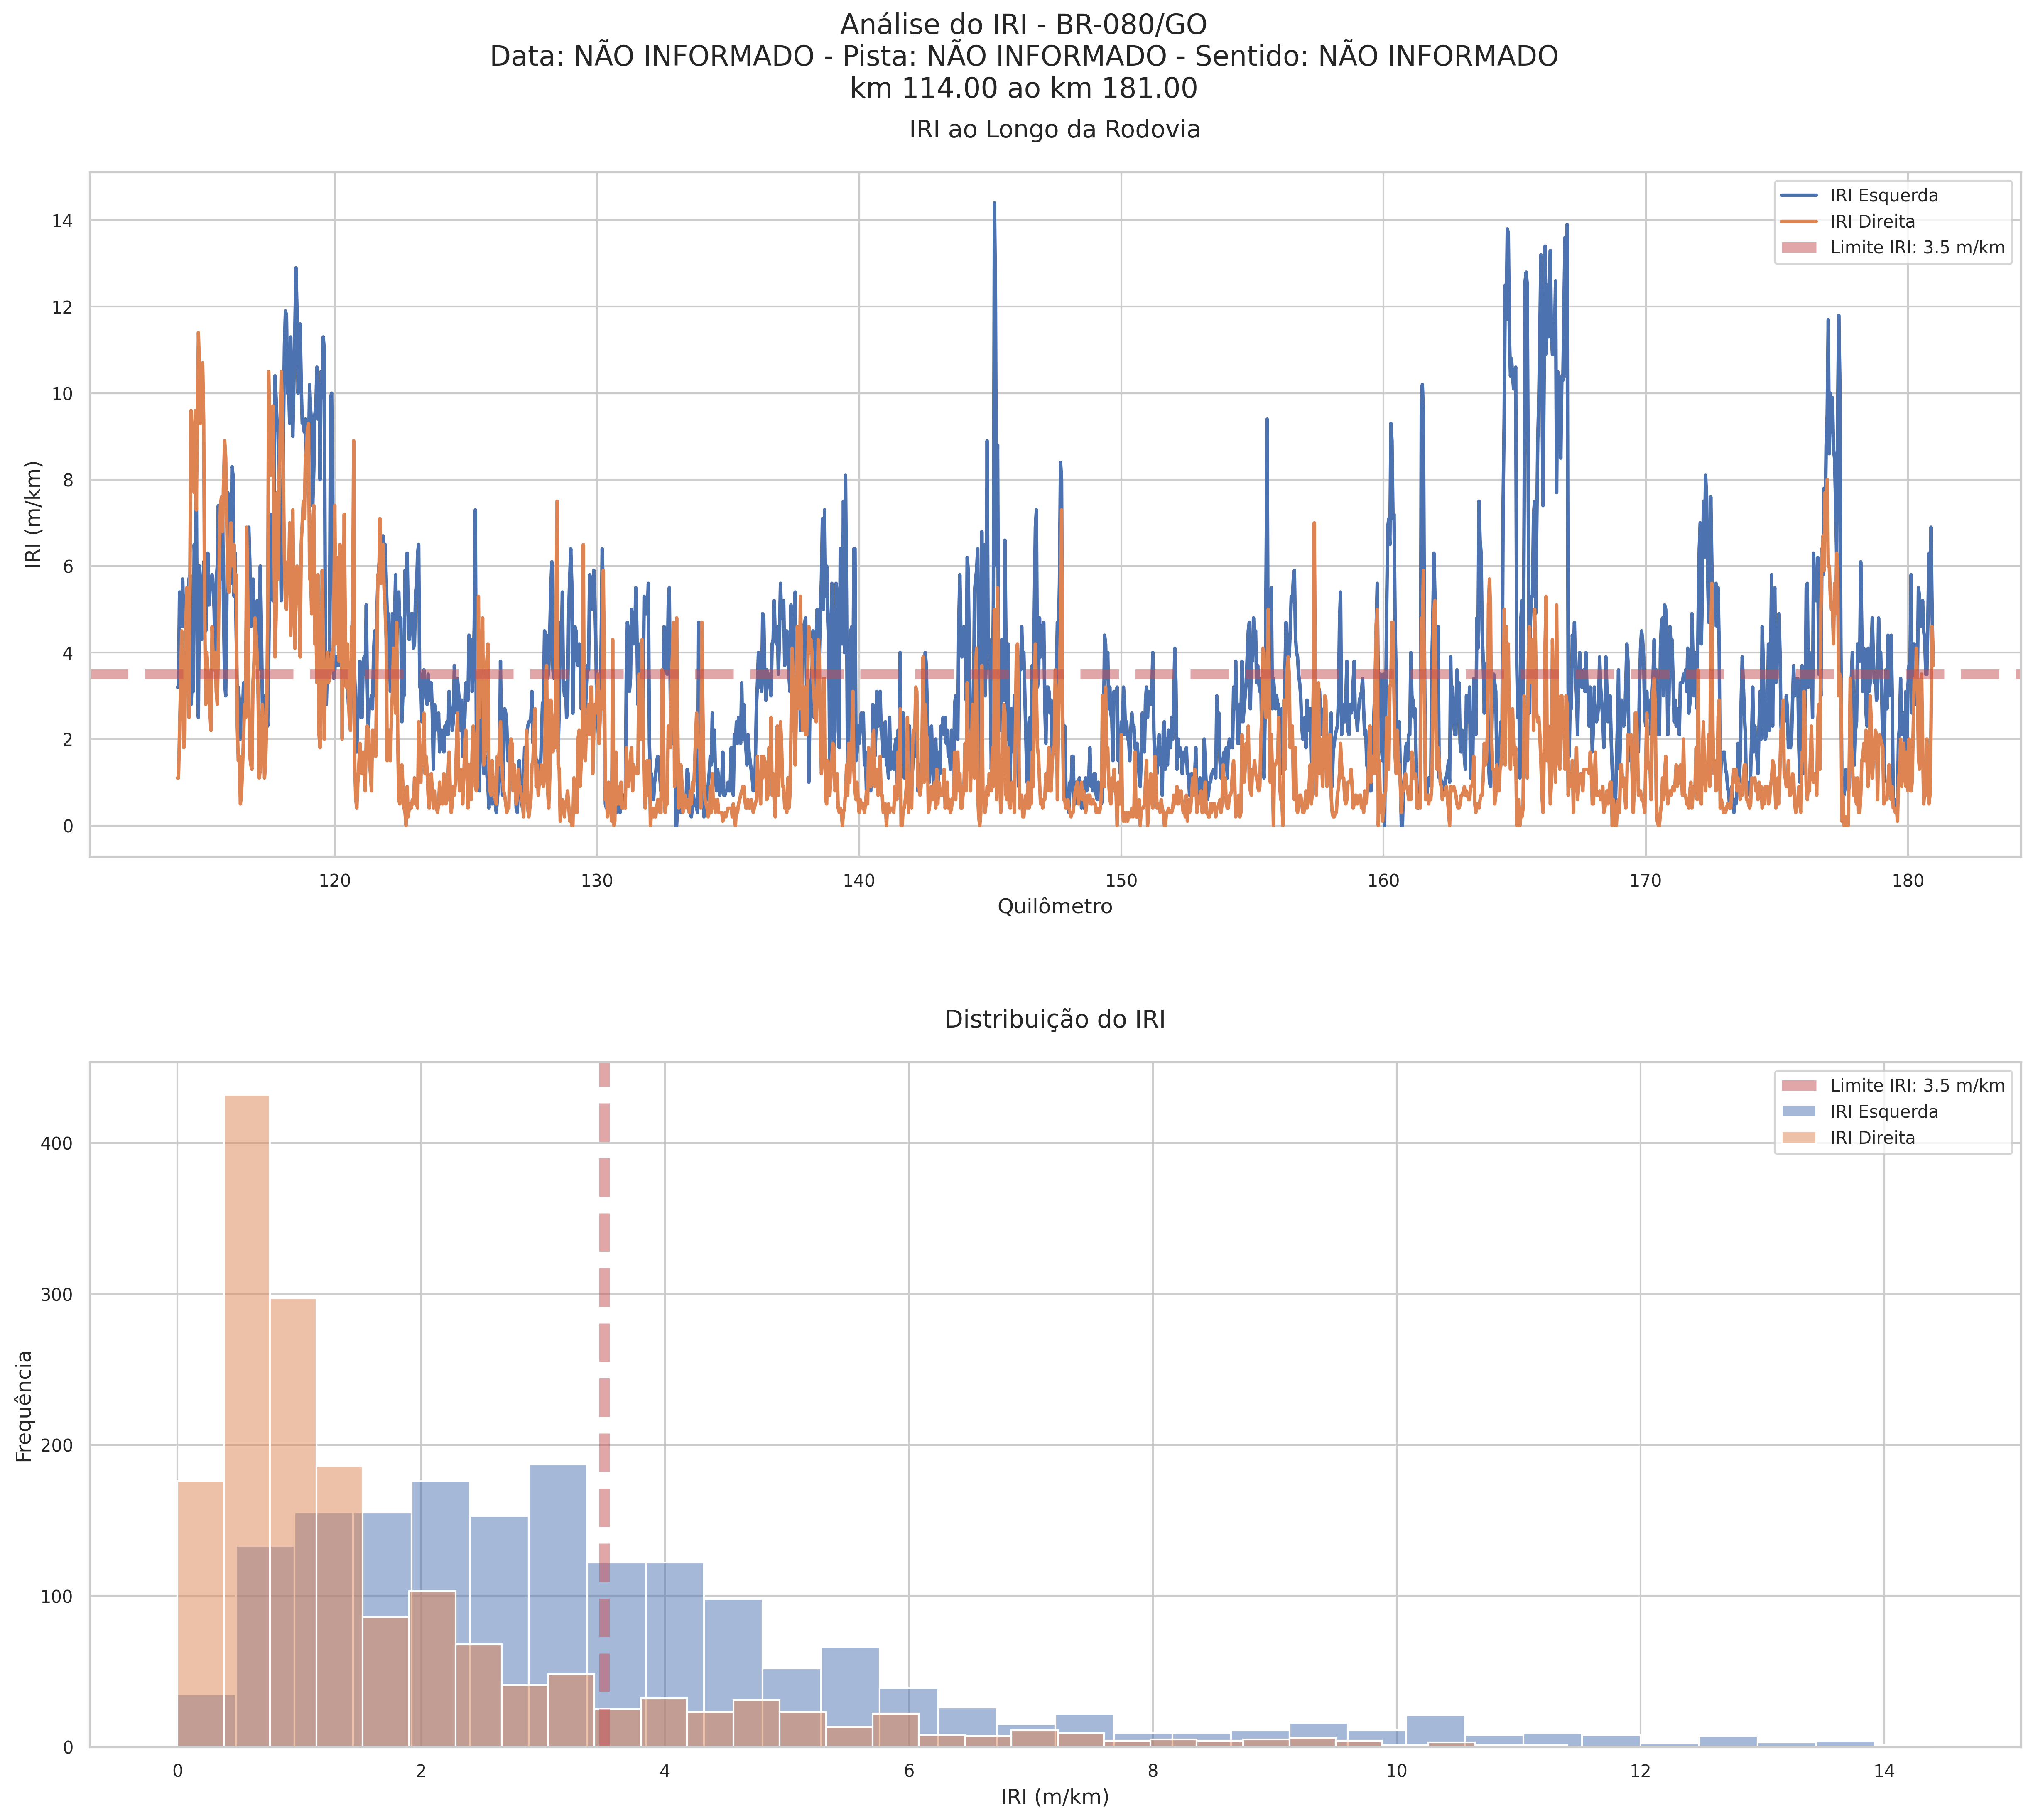

/tmp/ipykernel_388459/2355100427.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


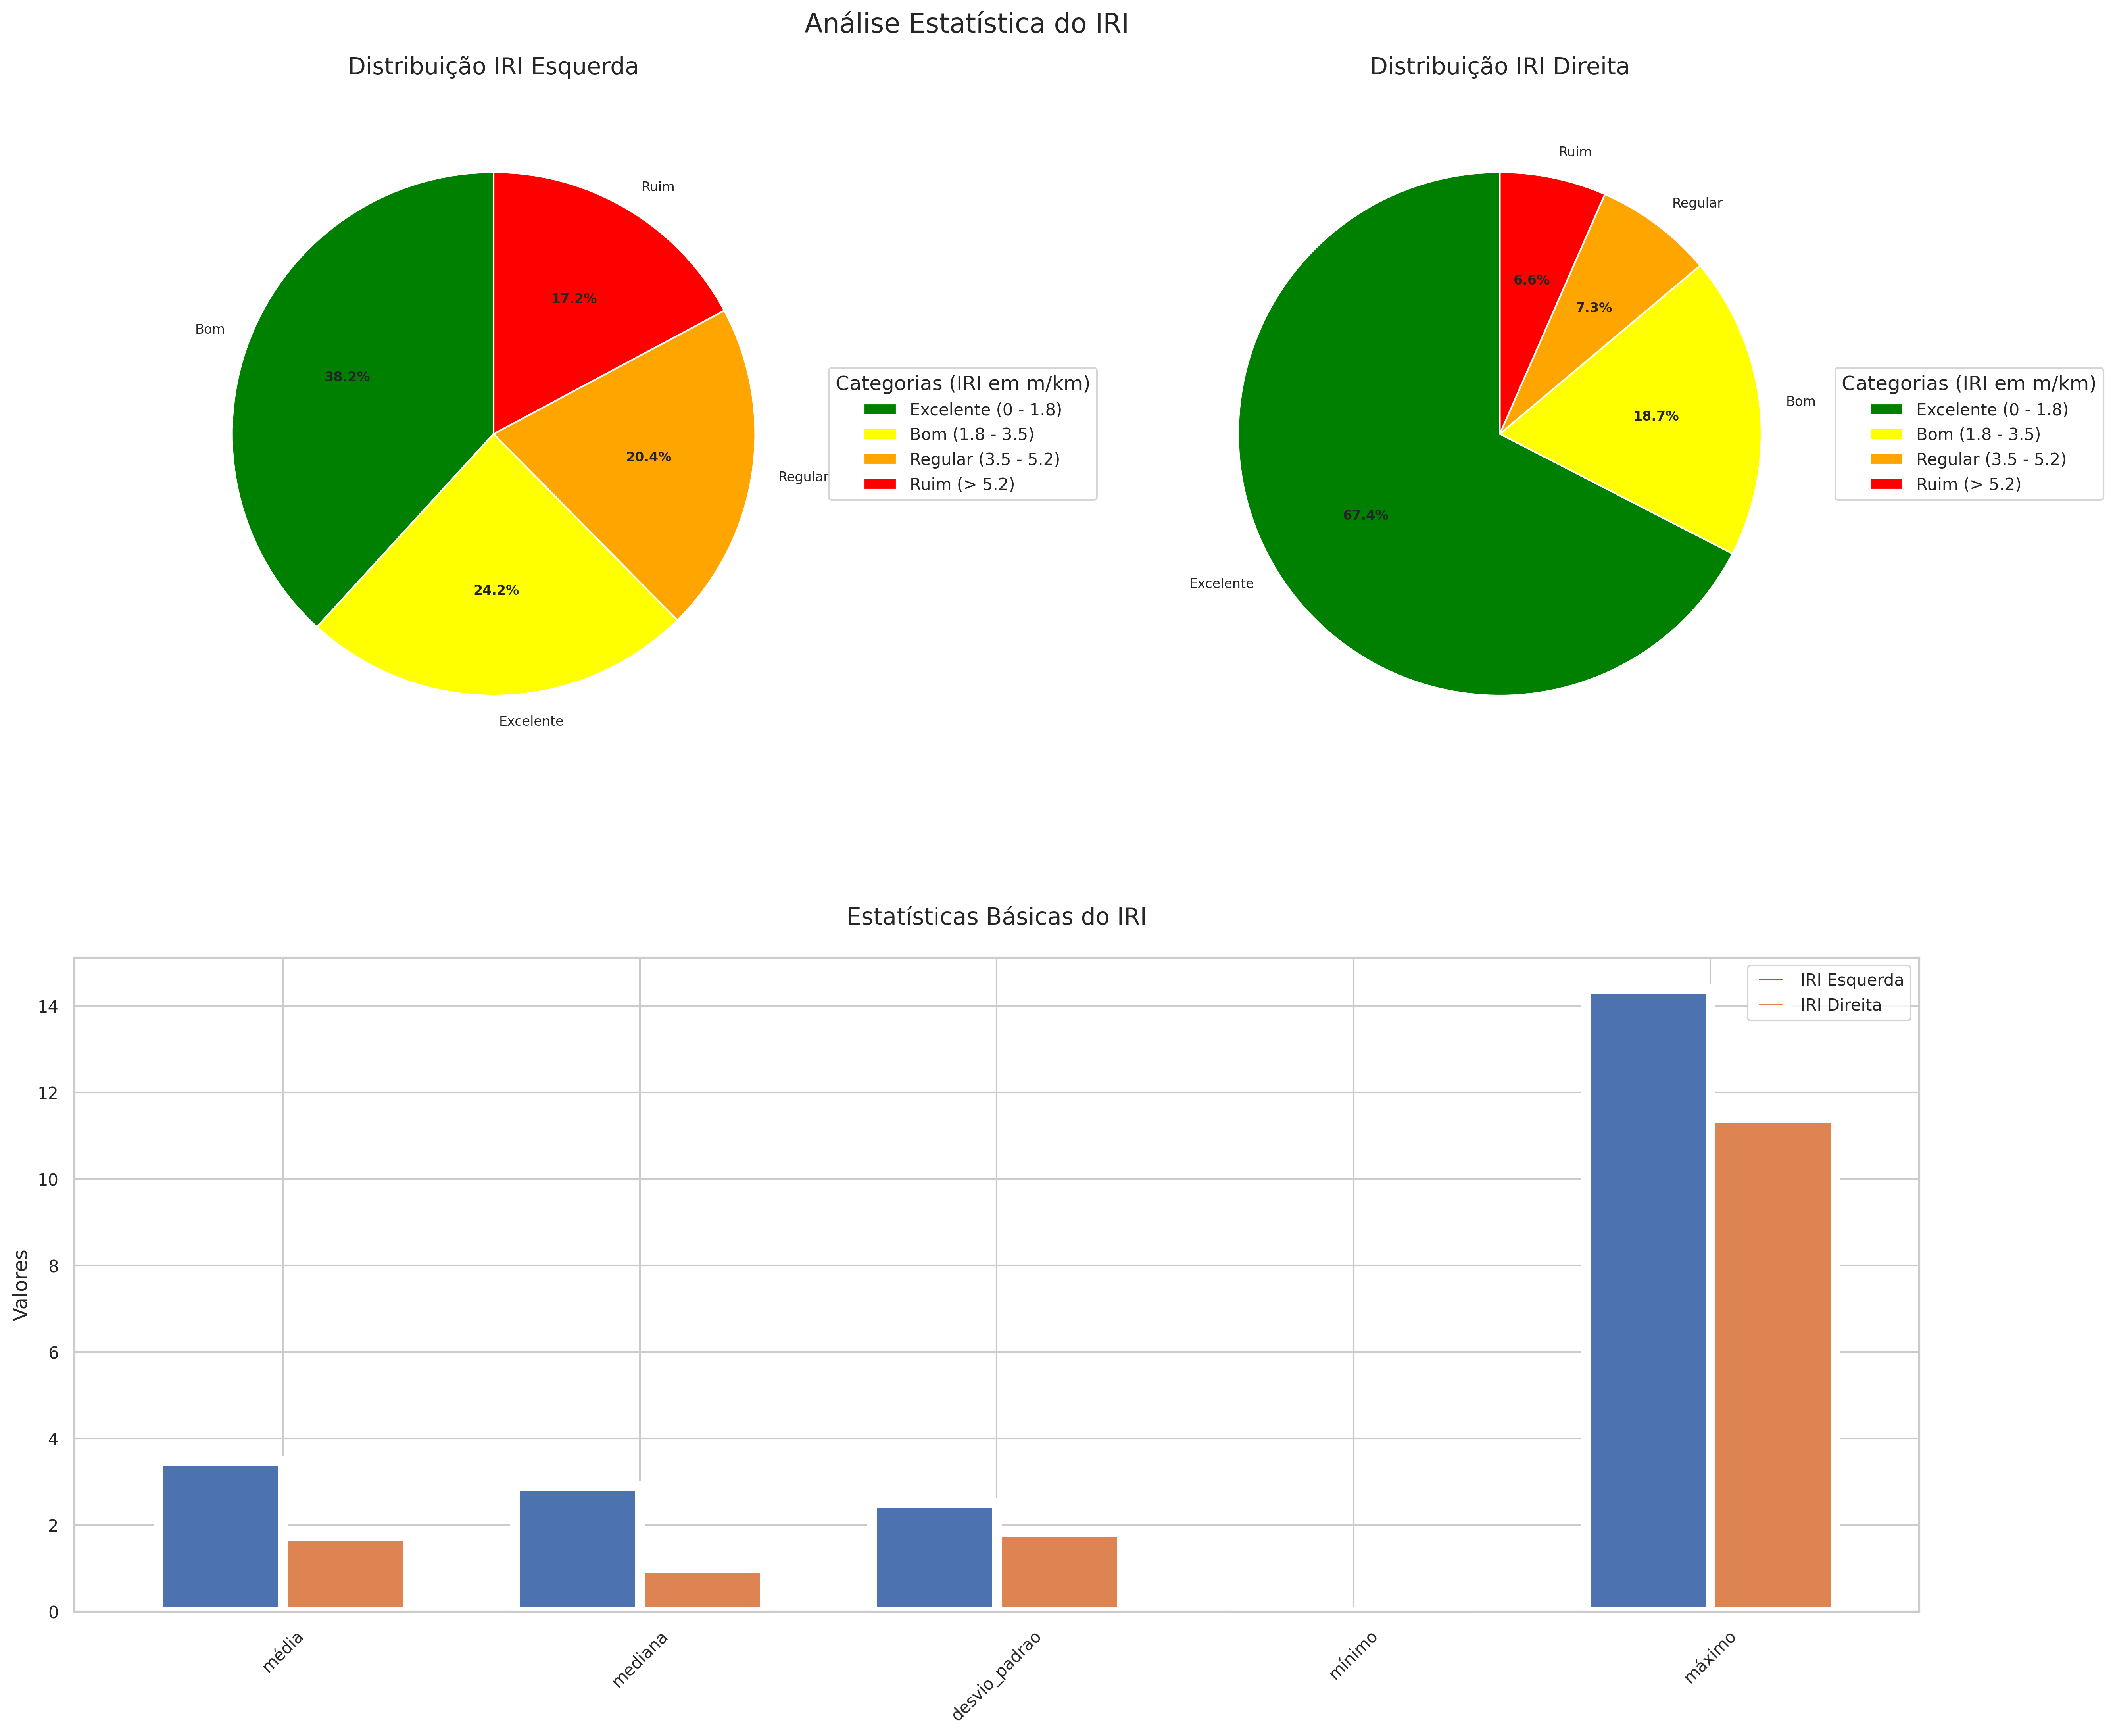

2024-12-04 19:24:58,321 - INFO - Preparando dados para Machine Learning...
2024-12-04 19:24:58,331 - INFO - Dimensões dos dados:
2024-12-04 19:24:58,332 - INFO - - Features: (1671, 6)
2024-12-04 19:24:58,333 - INFO - - Targets: (1671, 2)
2024-12-04 19:24:58,333 - INFO - Treinando modelos...
2024-12-04 19:24:58,334 - INFO - Iniciando treinamento dos modelos...
2024-12-04 19:24:58,334 - INFO - 
Otimizando modelo para Next_IRI_Esquerda...


Dados preparados com sucesso. Shape das features: (1671, 6), Shape dos targets: (1671, 2)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   1.4s
[CV] END bootstrap=True, max_depth=30,

2024-12-04 19:25:42,995 - INFO - Resultados para Next_IRI_Esquerda:
2024-12-04 19:25:42,996 - INFO - RMSE: 1.105
2024-12-04 19:25:42,997 - INFO - R²: 0.811
2024-12-04 19:25:42,998 - INFO - 
Otimizando modelo para Next_IRI_Direita...


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   3.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=459; total time=   4.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=

2024-12-04 19:26:26,596 - INFO - Resultados para Next_IRI_Direita:
2024-12-04 19:26:26,598 - INFO - RMSE: 0.878
2024-12-04 19:26:26,600 - INFO - R²: 0.665
2024-12-04 19:26:26,605 - INFO - Gerando visualizações e recomendações...
2024-12-04 19:26:27,508 - INFO - Proporção final de anomalias: 16.7%
2024-12-04 19:26:27,516 - INFO - Estatísticas dos trechos anômalos:
2024-12-04 19:26:27,518 - INFO - - Quantidade: 279
2024-12-04 19:26:27,521 - INFO - - IRI médio: 5.70
2024-12-04 19:26:27,522 - INFO - - IRI mín: 0.15
2024-12-04 19:26:27,524 - INFO - - IRI máx: 9.70
2024-12-04 19:26:27,539 - INFO - Detectadas 279 anomalias (16.7% dos dados)
2024-12-04 19:26:27,541 - INFO - Estatísticas dos trechos anômalos:
2024-12-04 19:26:27,543 - INFO - - IRI médio: 5.70
2024-12-04 19:26:27,545 - INFO - - IRI mín: 0.15
2024-12-04 19:26:27,548 - INFO - - IRI máx: 9.70


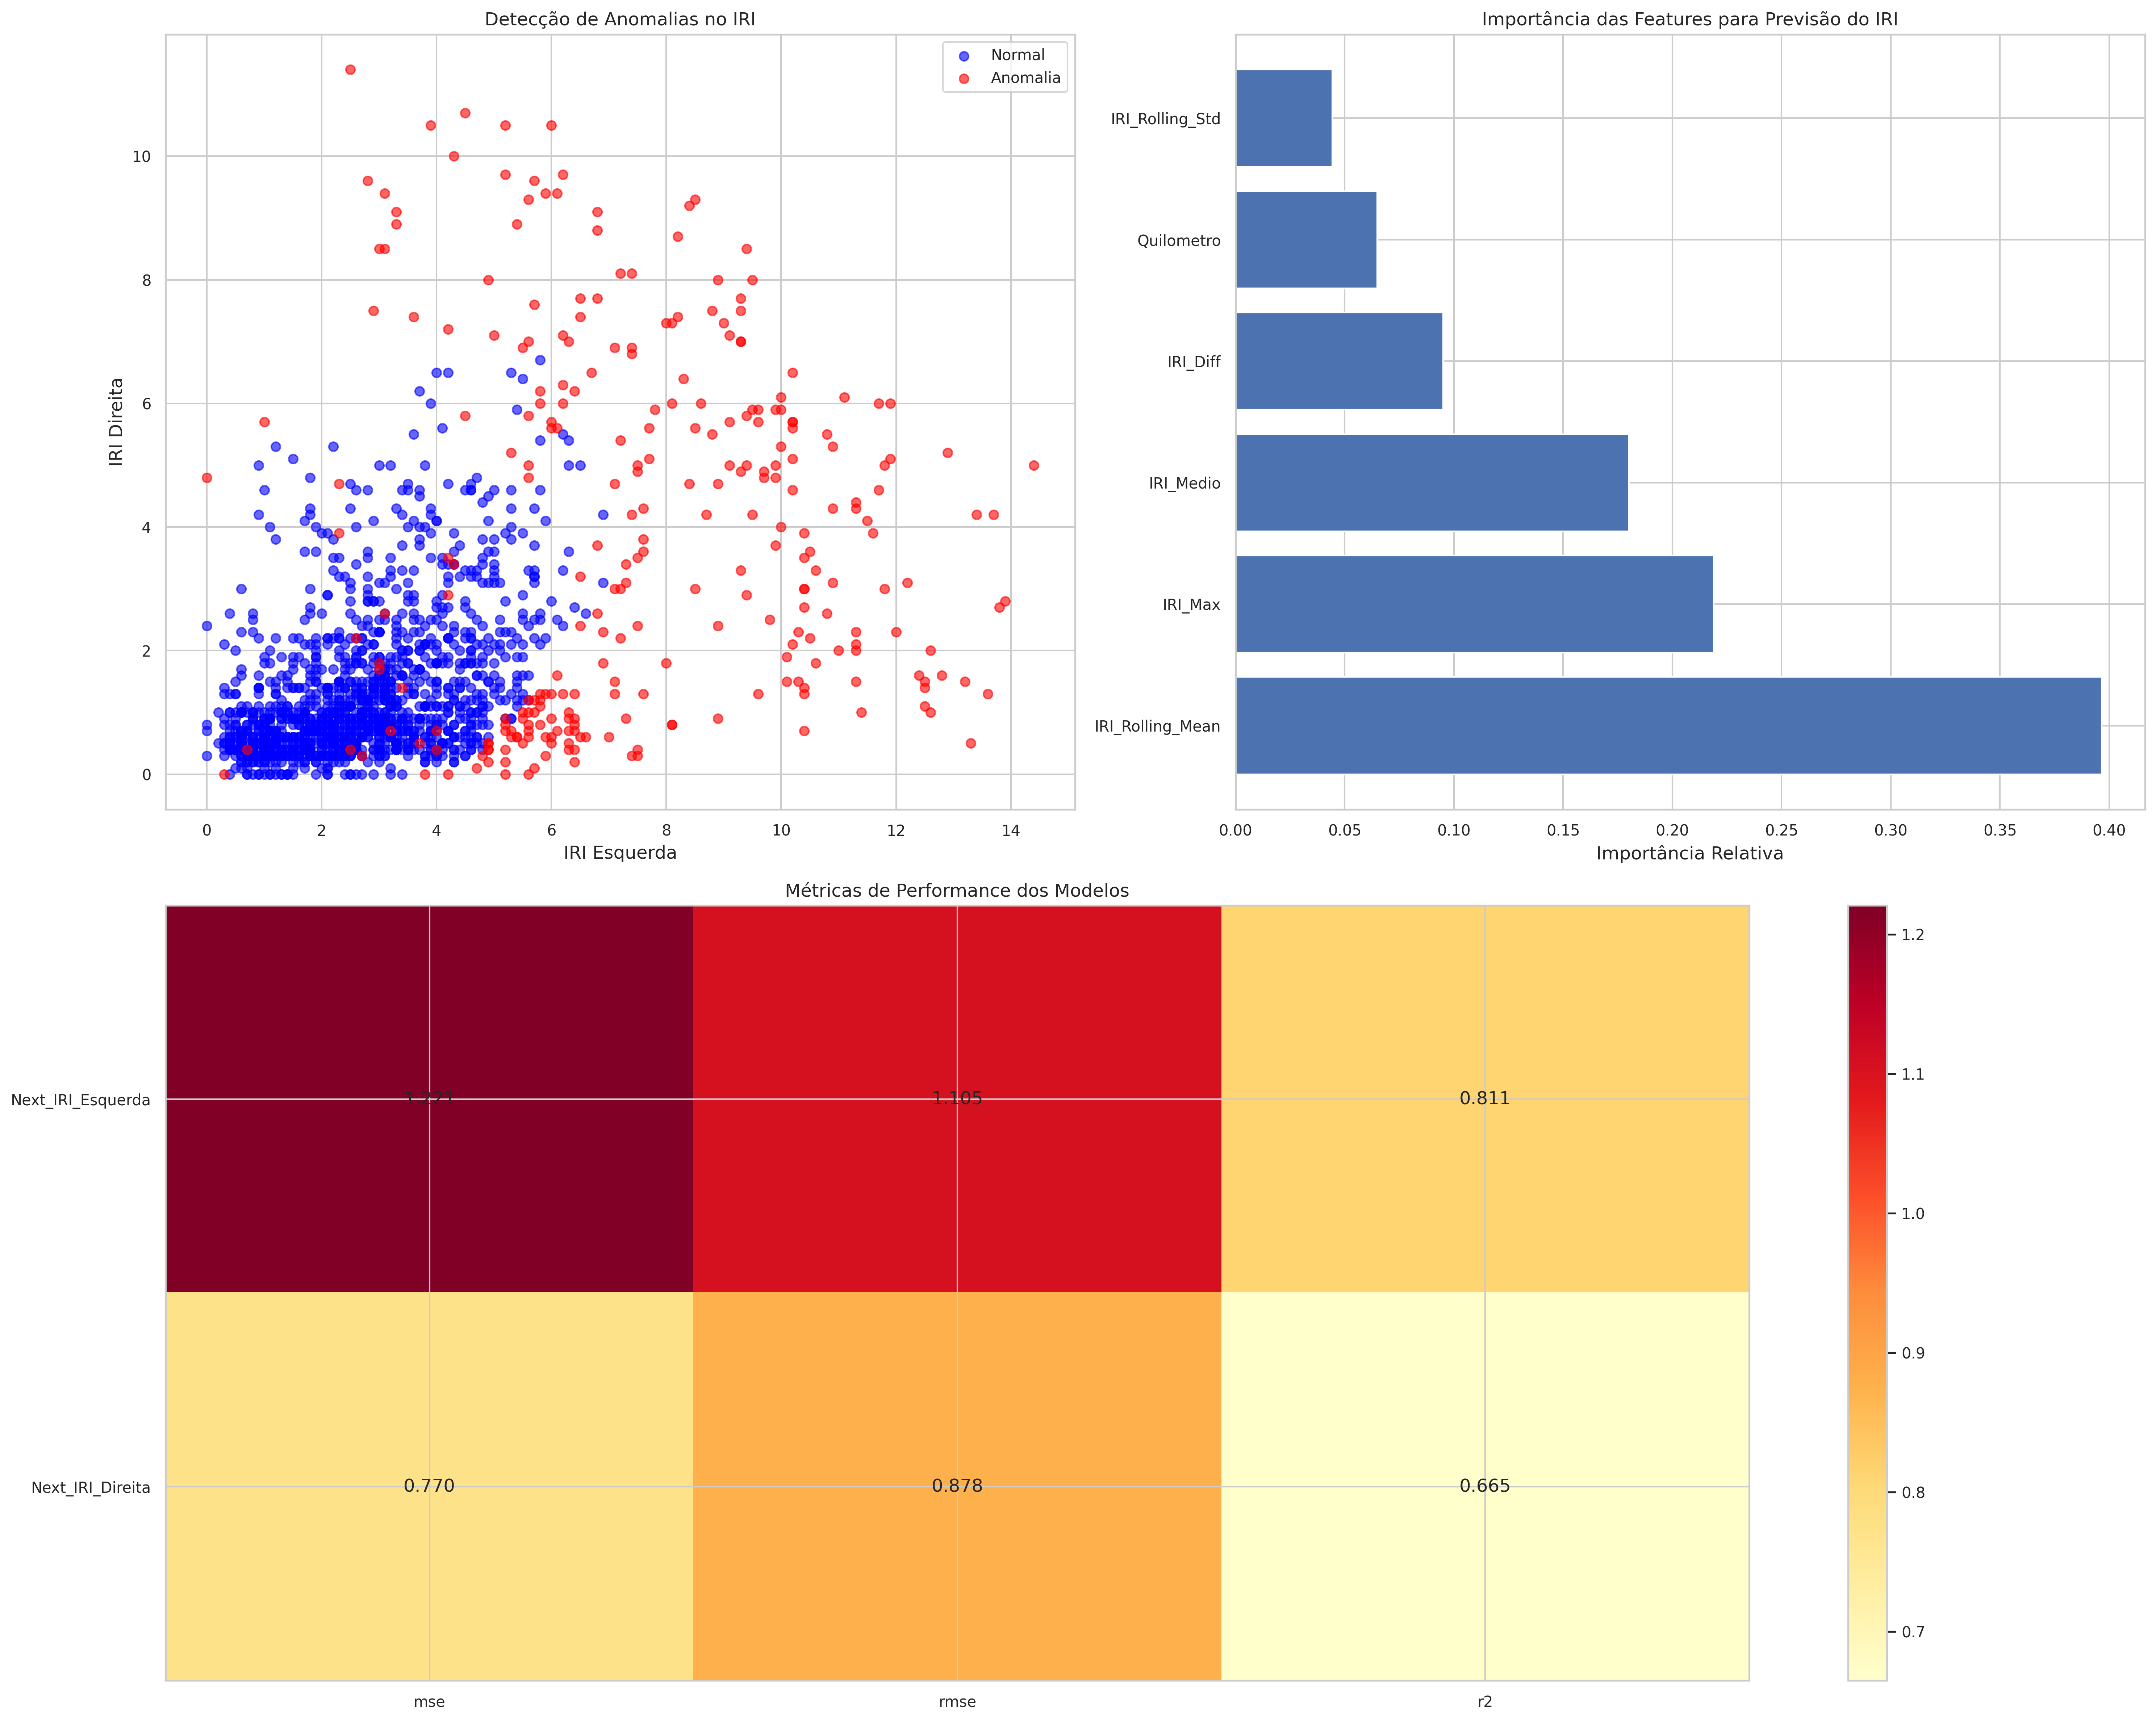


Insights principais:

1. Detecção de Anomalias:
- Detectadas 279 medições potencialmente problemáticas

2. Features mais importantes para previsão:
- IRI_Rolling_Mean: 0.397
- IRI_Max: 0.219
- IRI_Medio: 0.180

3. Performance dos modelos:

Next_IRI_Esquerda:
- RMSE: 1.105
- R²: 0.811

Next_IRI_Direita:
- RMSE: 0.878
- R²: 0.665


2024-12-04 19:26:35,863 - INFO - Proporção final de anomalias: 16.7%
2024-12-04 19:26:35,869 - INFO - Estatísticas dos trechos anômalos:
2024-12-04 19:26:35,871 - INFO - - Quantidade: 279
2024-12-04 19:26:35,872 - INFO - - IRI médio: 5.70
2024-12-04 19:26:35,873 - INFO - - IRI mín: 0.15
2024-12-04 19:26:35,874 - INFO - - IRI máx: 9.70
2024-12-04 19:26:35,887 - INFO - Detectadas 279 anomalias (16.7% dos dados)
2024-12-04 19:26:35,888 - INFO - Estatísticas dos trechos anômalos:
2024-12-04 19:26:35,889 - INFO - - IRI médio: 5.70
2024-12-04 19:26:35,890 - INFO - - IRI mín: 0.15
2024-12-04 19:26:35,893 - INFO - - IRI máx: 9.70
2024-12-04 19:26:36,005 - INFO - Processamento concluído com sucesso!



Recomendações para Tomada de Decisão:

1. Manutenção Prioritária:
- Identificados 279 trechos críticos (16.7% do total)
- IRI médio nos trechos críticos: 5.70

Segmentos contínuos críticos:
- km 115.6 ao km 120.8 (5.2 km)
- km 164.6 ao km 167.0 (2.5 km)
- km 143.8 ao km 145.3 (1.5 km)

2. Tendência do Pavimento:
- Pavimento apresenta tendência estável ou de melhoria (-0.019)

3. Análise de Padrões:
  * IRI_Rolling_Mean: 0.397
  * IRI_Max: 0.219
  * IRI_Medio: 0.180

4. Distribuição do IRI:
- 25% dos trechos têm IRI abaixo de 1.30
- Mediana do IRI: 2.10
- 25% dos trechos têm IRI acima de 3.25

5. Recomendações Finais:
- MÉDIA-BAIXA: Monitorar com maior frequência

Ações Recomendadas:
  * Priorizar manutenção nos segmentos contínuos identificados


In [16]:
if __name__ == "__main__":
    try:
        logging.info("Iniciando processamento...")

        # Verificar se estamos no Google Colab
        IN_COLAB = 'google.colab' in str(get_ipython())
        
        if IN_COLAB:
            # Clonar o repositório
            !git clone https://github.com/romulobrito/Analise-IRI.git
            
            # Atualizar PROJECT_ROOT para o diretório do projeto clonado
            global PROJECT_ROOT
            PROJECT_ROOT = Path('/content/Analise-IRI')
            
            # Definir diretório de dados
            data_dir = PROJECT_ROOT / "data"
            
            # Se os dados não estiverem no repositório, solicitar upload
            if not (data_dir / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx").exists():
                from google.colab import files
                print("Dados não encontrados no repositório. Por favor, faça upload dos arquivos Excel e PDF")
                uploaded = files.upload()
                
                # Criar diretório data se não existir
                data_dir.mkdir(parents=True, exist_ok=True)
                
                # Mover arquivos uploadados para o diretório data
                for filename in uploaded.keys():
                    source = Path(filename)
                    destination = data_dir / filename
                    if source.exists():
                        with open(destination, 'wb') as f:
                            f.write(uploaded[filename])
            
        else:
            # Verificar e criar diretório de dados se não existir
            data_dir = PROJECT_ROOT / "data"
            data_dir.mkdir(parents=True, exist_ok=True)
            logging.info(f"Diretório de dados verificado: {data_dir}")
        
        # Definir caminhos relativos à pasta data/
        caminho_excel = data_dir / "Cópia de 500-IMT-BR080GO - INVENTARIO km 114.00 ao km 181.00_copia.xlsx"
        caminho_pdf = data_dir / "PER_2024___4__Termo_Aditivo.pdf"

        # Verificar se os arquivos existem
        if not caminho_excel.exists():
            raise FileNotFoundError(f"Arquivo Excel não encontrado: {caminho_excel}")
        if not caminho_pdf.exists():
            raise FileNotFoundError(f"Arquivo PDF não encontrado: {caminho_pdf}")
            
        logging.info(f"Arquivos encontrados:")
        logging.info(f"- Excel: {caminho_excel.name}")
        logging.info(f"- PDF: {caminho_pdf.name}")
        
        # Configurar análise de IRI
        periodos_analise = ["12 meses"]
        logging.info(f"Períodos de análise: {periodos_analise}")
        
        # Extrair informações do cabeçalho
        logging.info("Extraindo informações do cabeçalho...")
        info_cabecalho = extrair_cabecalho(str(caminho_excel))
        
        # Processar dados do Excel
        logging.info("Carregando e processando dados...")
        df = pd.read_excel(caminho_excel)
        if df.empty:
            raise ValueError("DataFrame está vazio após leitura do Excel")
            
        # Extrair e validar limites de IRI
        logging.info("Extraindo limites de IRI do PDF...")
        limites = extrair_limites_iri(str(caminho_pdf), periodos_analise)
        
        if not limites:
            logging.warning("Usando valores padrão do DNIT")
            limites = usar_valores_padrao(periodos_analise[0])
            
        # Exibir limites extraídos
        logging.info("Limites extraídos por período na etapa BERT + camelot:")
        for periodo, valores in limites.items():
            logging.info(f"\nPeríodo: {periodo}")
            for valor in valores:
                logging.info(f"IRI: {valor['iri']} m/km aplicável em {valor['porcentagem']}% da rodovia")

        # Processar dados do pavimento
        df_processado = processar_dados_pavimento(df)
        if df_processado.empty:
            raise ValueError("DataFrame processado está vazio")
            
        # Validar colunas necessárias
        colunas_requeridas = ['Quilometro', 'IRI_Esquerda', 'IRI_Direita']
        if not all(col in df_processado.columns for col in colunas_requeridas):
            raise ValueError(f"Colunas necessárias não encontradas: {df_processado.columns.tolist()}")
        
        # Processar limites para ML
        periodo_base = periodos_analise[0]
        valores_periodo = limites.get(periodo_base, [])
        
        if not valores_periodo:
            logging.warning(f"Usando valores padrão para {periodo_base}")
            valores_periodo = usar_valores_padrao(periodo_base)[periodo_base]
            
        # Criar limites simplificados de forma adaptativa
        limites_simplificados = {}

        # Ordenar valores por IRI
        valores_ordenados = sorted(valores_periodo, key=lambda x: x['iri'])

        # Criar chaves dinâmicas baseadas nos valores e porcentagens
        for valor in valores_ordenados:
            chave = f"IRI_{valor['iri']}_{valor['porcentagem']}"
            limites_simplificados[chave] = [{
                'iri': valor['iri'],
                'porcentagem': valor['porcentagem']
            }]

        logging.info(f"\nLimites simplificados para {periodo_base}:")
        for tipo, valores in limites_simplificados.items():
            for valor in valores:
                logging.info(f"{tipo}: IRI {valor['iri']} m/km em {valor['porcentagem']}% da rodovia")

        # Gerar relatório e análises
        logging.info("Gerando relatório completo...")
        gerar_relatorio_completo(df_processado, limites_simplificados, info_cabecalho)
        
        # Preparar e validar dados para ML
        logging.info("Preparando dados para Machine Learning...")
        features, targets = preparar_dados_ml(df_processado)
        
        if features.empty or targets.empty:
            raise ValueError("Features ou targets vazios após preparação")
        
        logging.info(f"Dimensões dos dados:")
        logging.info(f"- Features: {features.shape}")
        logging.info(f"- Targets: {targets.shape}")
        
        # Treinar e avaliar modelos
        logging.info("Treinando modelos...")
        resultados_ml = treinar_modelo_predicao(features, targets)
        
        # Gerar visualizações e recomendações
        logging.info("Gerando visualizações e recomendações...")
        visualizar_insights_ml(df_processado, resultados_ml)
        gerar_recomendacoes(df_processado, resultados_ml)
        
        logging.info("Processamento concluído com sucesso!")
        
    except FileNotFoundError as e:
        logging.error(f"Erro ao encontrar arquivo: {e}")
    except ValueError as e:
        logging.error(f"Erro nos dados: {e}")
    except pd.errors.EmptyDataError as e:
        logging.error(f"Erro ao ler dados vazios: {e}")
    except Exception as e:
        logging.error(f"Erro inesperado: {e}")
        logging.error(traceback.format_exc())
    finally:
        plt.close('all')

Os gráficos e dados apresentados fornecem uma visão detalhada do comportamento do IRI da rodovia BR-080/GO. A análise de detecção de anomalias identificou 279 medições que se desviam do padrão esperado (16,7% dos dados coletados). Estas anomalias, indicadas em vermelho no gráfico de dispersão, correspondem a trechos críticos com valores de IRI significativamente elevados, apresentando um IRI médio de 5,70 m/km, com valores variando entre 0,15 e 9,70 m/km. Três segmentos contínuos críticos foram identificados: um trecho de 0,6 km (do km 114,5 ao 115,0), um segmento extenso de 5,2 km (do km 115,6 ao 120,8) e um trecho menor de 0,2 km (do km 121,6 ao 121,8), representando as áreas que demandam atenção mais urgente.

O gráfico de dispersão (scatterplot) no canto superior esquerdo apresenta a relação entre os valores de IRI das pistas esquerda e direita. Os pontos em azul representam trechos "normais", com valores de IRI dentro do comportamento esperado, enquanto os pontos em vermelho indicam anomalias que requerem atenção imediata. A concentração de pontos azuis no canto inferior esquerdo do gráfico (valores entre 0 e 3 m/km) indica que a maioria dos trechos está em boas condições. As anomalias (pontos vermelhos) aparecem principalmente em duas regiões: na região superior direita (IRI elevado em ambas as pistas, acima de 6 m/km) e nas regiões superior esquerda e inferior direita (desequilíbrio entre as condições das pistas).

A análise de importância das features mantém uma hierarquia clara na influência das variáveis sobre o comportamento do IRI. O IRI_Rolling_Mean como o fator mais significativo, com importância relativa de 0,397, seguido pelo IRI_Max com 0,219 e o IRI_Medio com 0,180. Esta distribuição de importância confirma que as condições médias do pavimento em trechos consecutivos têm maior impacto na previsão de sua degradação futura.

Os modelos de Machine Learning desenvolvidos demonstraram desempenho variado entre as pistas. Para a pista esquerda (Next_IRI_Esquerda), o modelo alcançou resultados robustos com R² de 0,811 e RMSE de 1,105, indicando uma boa capacidade de previsão. Já para a pista direita (Next_IRI_Direita), o desempenho foi moderado, com R² de 0,665 e RMSE de 0,878, sugerindo que outros fatores não contemplados no modelo podem influenciar o comportamento do pavimento neste lado da via.

A análise da distribuição do IRI revela um panorama diversificado das condições do pavimento. Aproximadamente 25% dos trechos apresentam IRI abaixo de 1,30, classificados como Excelente, com uma mediana de 2,10, e 25% dos trechos têm IRI acima de 3,25. A tendência geral do pavimento mostra uma leve melhoria, evidenciada pela taxa de variação negativa de -0,019, sugerindo que as ações de manutenção podem estar surtindo efeito.

Com base nestes resultados, recomenda-se uma abordagem estratégica para a manutenção da rodovia, classificada como MÉDIA PRIORIDADE. Primeiramente, deve-se priorizar intervenções nos três segmentos críticos identificados, com especial atenção ao segmento mais extenso de 5,2 km entre os quilômetros 115,6 e 120,8. A implementação de um sistema de monitoramento contínuo com foco especial no IRI_Rolling_Mean é recomendada, dado seu alto impacto nas previsões do modelo. O planejamento de manutenção preventiva deve considerar a alocação estratégica de recursos nos trechos classificados como Regular e Ruim, utilizando as previsões geradas pelos modelos para otimizar as intervenções.

Esta abordagem orientada por dados oferece uma base para decisões de manutenção, permitindo a otimização dos recursos disponíveis e garantindo a segurança e o conforto dos usuários da rodovia. A combinação de análise de anomalias, modelagem preditiva e monitoramento contínuo fornece as ferramentas necessárias para uma gestão mais eficiente e proativa da infraestrutura rodoviária.

A análise abrangente do Índice de Irregularidade Internacional (IRI) na BR-080/GO revela um cenário que demanda atenção diferenciada ao longo do trecho estudado. O perfil longitudinal do IRI demonstra variações significativas em ambas as pistas, com valores que frequentemente ultrapassam os limites aceitáveis. O limite de 2,7 m/km representa o valor recomendado para boas condições da rodovia, enquanto 3,5 m/km indica o limite máximo aceitável antes da necessidade de intervenções de manutenção.

A pista esquerda apresenta condições mais críticas, com picos significativos nos quilômetros 120, 150 e 170, onde os valores ultrapassam consideravelmente o limite de 3,5 m/km, atingindo até 14 m/km em pontos específicos. A pista direita, por sua vez, mostra comportamento mais estável, embora também apresente pontos de atenção próximos aos quilômetros 120 e 170. Esta disparidade é evidenciada pela análise estatística, que mostra uma média de IRI em torno de 3,5 m/km para a pista esquerda e 1,8 m/km para a pista direita.

A distribuição do IRI, apresentada no histograma, confirma este contraste entre as pistas. A pista direita concentra 67,4% das medições em condição Excelente (abaixo de 1,8 m/km), com apenas 6% em estado Ruim. Em contrapartida, a pista esquerda apresenta 38,2% do trecho em estado Bom (entre 1,8 e 3,5 m/km), 24,2% Regular (entre 3,5 e 5,2 m/km) e 17,2% em condição Ruim (acima de 5,2 m/km).
A análise de anomalias identificou 279 medições críticas (16,7% dos dados), com IRI médio de 5,70 m/km e variação entre 0,15 e 9,70 m/km. Três segmentos críticos principais foram detectados: um trecho de 0,6 km (km 114,5-115,0), um segmento extenso de 5,2 km (km 115,6-120,8), considerado o mais crítico, e um trecho menor de 0,2 km (km 121,6-121,8).

A modelagem preditiva desenvolvida apresentou performance variada entre as pistas. Para a pista esquerda, o modelo alcançou resultados robustos com R² de 0,811 e RMSE de 1,105. Para a pista direita, o desempenho foi moderado, com R² de 0,665 e RMSE de 0,878. A análise de importância das features identificou o IRI_Rolling_Mean como fator mais significativo (0,397), seguido pelo IRI_Max (0,219) e IRI_Medio (0,180).

Com base nestes resultados, recomenda-se uma abordagem estratégica para manutenção da rodovia, classificada como MÉDIA PRIORIDADE. As intervenções devem priorizar o segmento crítico de 5,2 km entre os quilômetros 115,6 e 120,8, além de implementar monitoramento contínuo com foco no IRI_Rolling_Mean. O planejamento deve considerar a alocação estratégica de recursos nos trechos classificados como Regular e Ruim, utilizando as previsões dos modelos para otimizar as intervenções.

A análise integrada demonstra a necessidade de uma abordagem diferenciada para cada pista, com atenção especial aos segmentos críticos identificados. A combinação de monitoramento contínuo e modelagem preditiva fornece as ferramentas necessárias para uma gestão eficiente e proativa da infraestrutura rodoviária, assegurando a otimização dos recursos de manutenção e a qualidade do pavimento para os usuários.

📜 7. Conclusão

A análise abrangente do Índice de Irregularidade Internacional (IRI) na BR-080/GO, entre os quilômetros 114.00 e 181.00, revelou um cenário complexo que demanda uma gestão estratégica e diferenciada da manutenção rodoviária. Através da combinação de análise visual, técnicas de Machine Learning e modelagem preditiva, foi possível identificar padrões críticos de deterioração e estabelecer previsões significativas para o comportamento futuro do pavimento.

A investigação identificou 279 trechos críticos (16,7% do total), com destaque para três segmentos contínuos que requerem atenção prioritária: 5,2 km (km 115,6-120,8), 0,6 km (km 114,5-115,0) e 0,2 km (km 121,6-121,8). Nestes trechos, o IRI médio de 5,70 m/km ultrapassa significativamente o limite aceitável de 3,5 m/km, indicando deterioração severa do pavimento.
Os modelos preditivos demonstraram performance robusta, particularmente para a pista esquerda (R² = 0,811, RMSE = 1,105), enquanto a pista direita apresentou resultados moderados (R² = 0,665, RMSE = 0,878). A análise de importância das features destacou o IRI_Rolling_Mean (0,397) como principal indicador preditivo, seguido pelo IRI_Max (0,219) e IRI_Medio (0,180), fornecendo diretrizes claras para o monitoramento futuro.

A distribuição assimétrica do IRI entre as pistas, com a pista direita apresentando 67,4% dos trechos em condição Excelente e a pista esquerda mostrando maior variabilidade e degradação, sugere a necessidade de uma abordagem diferenciada para cada lado da rodovia. Esta disparidade, combinada com a tendência estável do pavimento (taxa de -0,019), indica que as práticas atuais de manutenção são parcialmente efetivas, mas requerem otimização.

Para aprimoramento futuro do sistema, propõe-se quatro melhorias principais. A implementação de validação cruzada temporal permitirá avaliar a robustez do modelo ao longo do tempo, verificar a precisão das previsões em diferentes períodos e identificar padrões sazonais na degradação do pavimento. A incorporação de variáveis climáticas e de tráfego possibilitará compreender o impacto das condições meteorológicas e do volume de tráfego na degradação do pavimento, permitindo estratégias de manutenção mais específicas.

A análise detalhada de resíduos contribuirá para identificar padrões sistemáticos de erro nas previsões, verificar a presença de heterocedasticidade nos dados e refinar os parâmetros do modelo para melhorar a precisão em casos específicos. Por fim, a utilização de SHAP values aumentará a interpretabilidade das decisões do modelo, permitindo compreender melhor a contribuição individual de cada feature e fornecendo explicações mais transparentes para as previsões realizadas.

Estas melhorias, quando implementadas em conjunto, proporcionarão maior confiabilidade nas previsões, melhor compreensão dos fatores que influenciam a degradação do pavimento e decisões de manutenção mais precisas e fundamentadas. A implementação gradual destes aprimoramentos permitirá um sistema mais robusto e confiável para a gestão da manutenção rodoviária, resultando em melhor planejamento e execução das intervenções necessárias.

Esta análise demonstra o potencial significativo da aplicação de técnicas avançadas de análise de dados na gestão rodoviária, proporcionando uma base sólida para decisões fundamentadas e otimização de recursos na manutenção da infraestrutura rodoviária. O desenvolvimento contínuo e a implementação das melhorias propostas garantirão um sistema cada vez mais preciso e eficiente para o monitoramento e manutenção da qualidade do pavimento.